# Parametric Circuit Fitting Belem

In [2]:
import sys
sys.path.insert(0, '../../src_tf/')

import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
import multiprocessing as mp
import random
import pickle

from qiskit.quantum_info import DensityMatrix, random_unitary
from qiskit.quantum_info import Operator
from scipy.linalg import sqrtm
from tqdm.notebook import tqdm
from math import ceil

from loss_functions import *
from optimization import *
from quantum_channel import *
from kraus_channels import *
from quantum_tools import *
from experimental import *
from spam import *
from scipy.stats import gaussian_kde

#np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=4)

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [3]:
def fit_model(filename, rank, ratio = None, ):
    inputs_map, targets_map, inputs_spam, targets_spam =  pickle.load(open(f"../../data/{filename}", "rb"))
    
    d = targets_map.shape[1]
    n = int(np.log2(d))
    
    if ratio is not None:
        inputs_map, targets_map, _, _ = train_val_split(inputs_map, targets_map, ratio=ratio)
    
    spam = SPAM(init = InitialState(d, c=None),
                povm = CorruptionMatrix(d, c=None),
                optimizer = tf.optimizers.Adam(learning_rate=0.01),
                )
    
    spam.pretrain(num_iter = 300)
    
    spam.train(inputs = inputs_spam,
               targets = targets_spam,
               num_iter = 2000,
               verbose = False,
              )
    
    model = ModelQuantumMap(channel = KrausMap(d=d, 
                                                   rank=rank,
                                                   spam = spam,
                                                  ),
                               loss_function = KLDiv(),
                               optimizer = tf.optimizers.Adam(learning_rate=0.01),
                               logger = Logger(loss_function = KLDiv(), verbose=False),
                               )

    model.train(inputs = inputs_map,
                targets = targets_map,
                num_iter = 2000,
                )
    return model

In [4]:
def spectrum_to_radial(spectrum):
    radial = tf.norm(spectrum, axis=1)
    return radial

def spectrum_to_angular(spectrum):
    angular = tf.math.angle(spectrum[:-1,0] + 1j*spectrum[:-1,1])
    return angular

def angular_histogram(spectrum_list, bins, color="b"):
    angular_list = [spectrum_to_angular(spectrum) for spectrum in spectrum_list]
    angular = np.concatenate(angular_list)
    plt.hist(angular, bins, color=color)

def find_outer_inner_R(spectrum_list):
    L = len(spectrum_list)
    radial_list = np.array([np.sort(spectrum_to_radial(spectrum)) for spectrum in spectrum_list])
    R_minus = np.mean(radial_list[:,0])
    R_minus_std = np.std(radial_list[:,0])
    R_plus = np.mean(radial_list[:,-1])
    R_plus_std = np.std(radial_list[:,-1])
    return R_plus, R_minus, R_plus_std, R_minus_std

## Three Qubits

In [4]:
model_list1 = []

for i in range(10):
    model = fit_model(f"belem_3qubits_8layers{i}",  64)
    model_list1.append(model)

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

0.0006217501895683497


  0%|          | 0/2000 [00:00<?, ?it/s]

0.0033942428363442564 None


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

0.0013135179729648297


  0%|          | 0/2000 [00:00<?, ?it/s]

0.004542660369057207 None


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

0.001279951841048896


  0%|          | 0/2000 [00:00<?, ?it/s]

0.0034092347226137203 None


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

0.001260689659941549


  0%|          | 0/2000 [00:00<?, ?it/s]

0.0026031377342560203 None


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

0.0012712851428760311


  0%|          | 0/2000 [00:00<?, ?it/s]

0.0020327979380698542 None


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

0.001192957301633621


  0%|          | 0/2000 [00:00<?, ?it/s]

0.0024105386982936497 None


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

0.0018990382267372278


  0%|          | 0/2000 [00:00<?, ?it/s]

0.005386009857643299 None


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

0.0012296073779272747


  0%|          | 0/2000 [00:00<?, ?it/s]

0.0025976378278924628 None


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

0.0012825291905048987


  0%|          | 0/2000 [00:00<?, ?it/s]

7.331239818835781e-05 None


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

0.0011041051555676275


  0%|          | 0/2000 [00:00<?, ?it/s]

0.0007890122480412904 None


In [5]:
model_list2 = []

for i in range(10):
    model = fit_model(f"belem_3qubits_16layers{i}",  64)
    model_list2.append(model)

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

0.0012361127417993478


  0%|          | 0/2000 [00:00<?, ?it/s]

0.0033319642461759375 None


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

0.0010893726635903627


  0%|          | 0/2000 [00:00<?, ?it/s]

0.0014066709123956539 None


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

0.0011106498004772372


  0%|          | 0/2000 [00:00<?, ?it/s]

0.001006653555151182 None


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

0.0011407196543363057


  0%|          | 0/2000 [00:00<?, ?it/s]

0.0014511474859401708 None


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

0.0011675719142883174


  0%|          | 0/2000 [00:00<?, ?it/s]

4.7277595192754134e-05 None


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

0.0009967461442811384


  0%|          | 0/2000 [00:00<?, ?it/s]

-0.0006313280062705835 None


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

0.0013335967701896797


  0%|          | 0/2000 [00:00<?, ?it/s]

0.004240676555935088 None


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

0.0017745292561495703


  0%|          | 0/2000 [00:00<?, ?it/s]

0.0035176148385829423 None


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

0.0011682333232045405


  0%|          | 0/2000 [00:00<?, ?it/s]

-0.0003416653335148638 None


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

0.001192223830952555


  0%|          | 0/2000 [00:00<?, ?it/s]

-0.00021188755898060766 None


In [8]:
model_list3 = []

for i in range(10):
    model = fit_model(f"belem_3qubits_24layers{i}",  64)
    model_list3.append(model)

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

0.0012958831305811983


  0%|          | 0/2000 [00:00<?, ?it/s]

0.001538818148626314 None


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

0.002938692293644036


  0%|          | 0/2000 [00:00<?, ?it/s]

0.003354008079373418 None


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

0.0011531876488668157


  0%|          | 0/2000 [00:00<?, ?it/s]

0.0017928194351935376 None


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

0.0011823093514895773


  0%|          | 0/2000 [00:00<?, ?it/s]

0.001968842554555023 None


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

0.0012360408209447437


  0%|          | 0/2000 [00:00<?, ?it/s]

0.002508264151764881 None


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

0.001205446383382494


  0%|          | 0/2000 [00:00<?, ?it/s]

0.0010969254265272392 None


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

0.0010677107848432233


  0%|          | 0/2000 [00:00<?, ?it/s]

0.002030082529801175 None


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

0.0009947319734805516


  0%|          | 0/2000 [00:00<?, ?it/s]

0.0005294627911024455 None


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

0.0010848142194599443


  0%|          | 0/2000 [00:00<?, ?it/s]

0.0011657199191742686 None


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

0.0012057044107765399


  0%|          | 0/2000 [00:00<?, ?it/s]

0.0030280936711021074 None


In [9]:
model_list4 = []

for i in range(10):
    model = fit_model(f"belem_3qubits_32layers{i}",  64)
    model_list4.append(model)

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

0.005222503652291976


  0%|          | 0/2000 [00:00<?, ?it/s]

-0.0031139674879786384 None


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

0.006192442046531973


  0%|          | 0/2000 [00:00<?, ?it/s]

0.0016681824980337128 None


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

0.006069865808616985


  0%|          | 0/2000 [00:00<?, ?it/s]

0.002537503533012531 None


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

0.0054084970012784235


  0%|          | 0/2000 [00:00<?, ?it/s]

-0.00022462404252084973 None


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

0.007138343728198775


  0%|          | 0/2000 [00:00<?, ?it/s]

0.01828234199407352 None


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

0.00859783708971312


  0%|          | 0/2000 [00:00<?, ?it/s]

0.0033353145737600384 None


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

0.010370666262262044


  0%|          | 0/2000 [00:00<?, ?it/s]

0.002779016814011177 None


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

0.004612086892514232


  0%|          | 0/2000 [00:00<?, ?it/s]

-0.0027062239435807814 None


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

0.005200022583818449


  0%|          | 0/2000 [00:00<?, ?it/s]

0.00010314353223090815 None


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

0.005504808866319137


  0%|          | 0/2000 [00:00<?, ?it/s]

0.0007791231002038448 None


In [10]:
model_list5 = []

for i in range(10):
    model = fit_model(f"belem_3qubits_40layers{i}",  64)
    model_list5.append(model)

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

0.014545482481954863


  0%|          | 0/2000 [00:00<?, ?it/s]

0.00455775436560464 None


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

0.006015473598517997


  0%|          | 0/2000 [00:00<?, ?it/s]

0.0018562019132595158 None


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

0.004934698564593516


  0%|          | 0/2000 [00:00<?, ?it/s]

0.0013511291124195925 None


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

0.004143052532079648


  0%|          | 0/2000 [00:00<?, ?it/s]

-0.005770400979808945 None


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

0.00484420304147979


  0%|          | 0/2000 [00:00<?, ?it/s]

-0.002497578524590948 None


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

0.004686185309077283


  0%|          | 0/2000 [00:00<?, ?it/s]

0.03271637950438091 None


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

0.005964605086732889


  0%|          | 0/2000 [00:00<?, ?it/s]

0.0015036541960526586 None


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

0.006124716104806926


  0%|          | 0/2000 [00:00<?, ?it/s]

0.0025940826393842536 None


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

0.005275073236589257


  0%|          | 0/2000 [00:00<?, ?it/s]

0.0011005773312596841 None


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

0.00935143323897267


  0%|          | 0/2000 [00:00<?, ?it/s]

0.0029172215446413977 None


In [11]:
model_list6 = []

for i in range(10):
    model = fit_model(f"belem_3qubits_48layers{i}",  64)
    model_list6.append(model)

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

0.045135767496490786


  0%|          | 0/2000 [00:00<?, ?it/s]

0.006545433319296517 None


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

0.0064902299164923


  0%|          | 0/2000 [00:00<?, ?it/s]

0.0014751057126194077 None


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

0.0059457864881170275


  0%|          | 0/2000 [00:00<?, ?it/s]

0.00014736814466267948 None


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

0.005853029858843268


  0%|          | 0/2000 [00:00<?, ?it/s]

0.0009886884571683608 None


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

0.00562679833613343


  0%|          | 0/2000 [00:00<?, ?it/s]

-0.0004557717243329167 None


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

0.009434594469820578


  0%|          | 0/2000 [00:00<?, ?it/s]

0.0036291730823800584 None


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

0.0052253242590731


  0%|          | 0/2000 [00:00<?, ?it/s]

0.00018153670677855036 None


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

0.005669228754369443


  0%|          | 0/2000 [00:00<?, ?it/s]

0.001324336598628067 None


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

0.004930844937711939


  0%|          | 0/2000 [00:00<?, ?it/s]

-0.001159717727214808 None


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

0.006549651669208156


  0%|          | 0/2000 [00:00<?, ?it/s]

0.002342992891321972 None


In [27]:
model_list7 = []

for i in range(10):
    model = fit_model(f"belem_3qubits_56layers{i}",  64)
    model_list7.append(model)

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

0.005518586037417241


  0%|          | 0/2000 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [7]:
channel_list1 = [model.channel for model in model_list1]
channel_list2 = [model.channel for model in model_list2]
channel_list3 = [model.channel for model in model_list3]
channel_list4 = [model.channel for model in model_list4]
channel_list5 = [model.channel for model in model_list5]
channel_list6 = [model.channel for model in model_list6]
channel_list7 = [model.channel for model in model_list7]


with open("../../data/channel_fullRank_belem.p", "wb") as handle:
    pickle.dump([channel_list1, channel_list2, channel_list3, channel_list4, channel_list5, channel_list6, channel_list7], handle)

In [6]:
[channel_list1, channel_list2, channel_list3, channel_list4, channel_list5, channel_list6, channel_list7] = pickle.load(open("../../data/channel_fullRank_belem.p", "rb"))

spectrum_list1 = [channel_spectrum(channel) for channel in channel_list1]
spectrum_list2 = [channel_spectrum(channel) for channel in channel_list2]
spectrum_list3 = [channel_spectrum(channel) for channel in channel_list3]
spectrum_list4 = [channel_spectrum(channel) for channel in channel_list4]
spectrum_list5 = [channel_spectrum(channel) for channel in channel_list5]
spectrum_list6 = [channel_spectrum(channel) for channel in channel_list6]

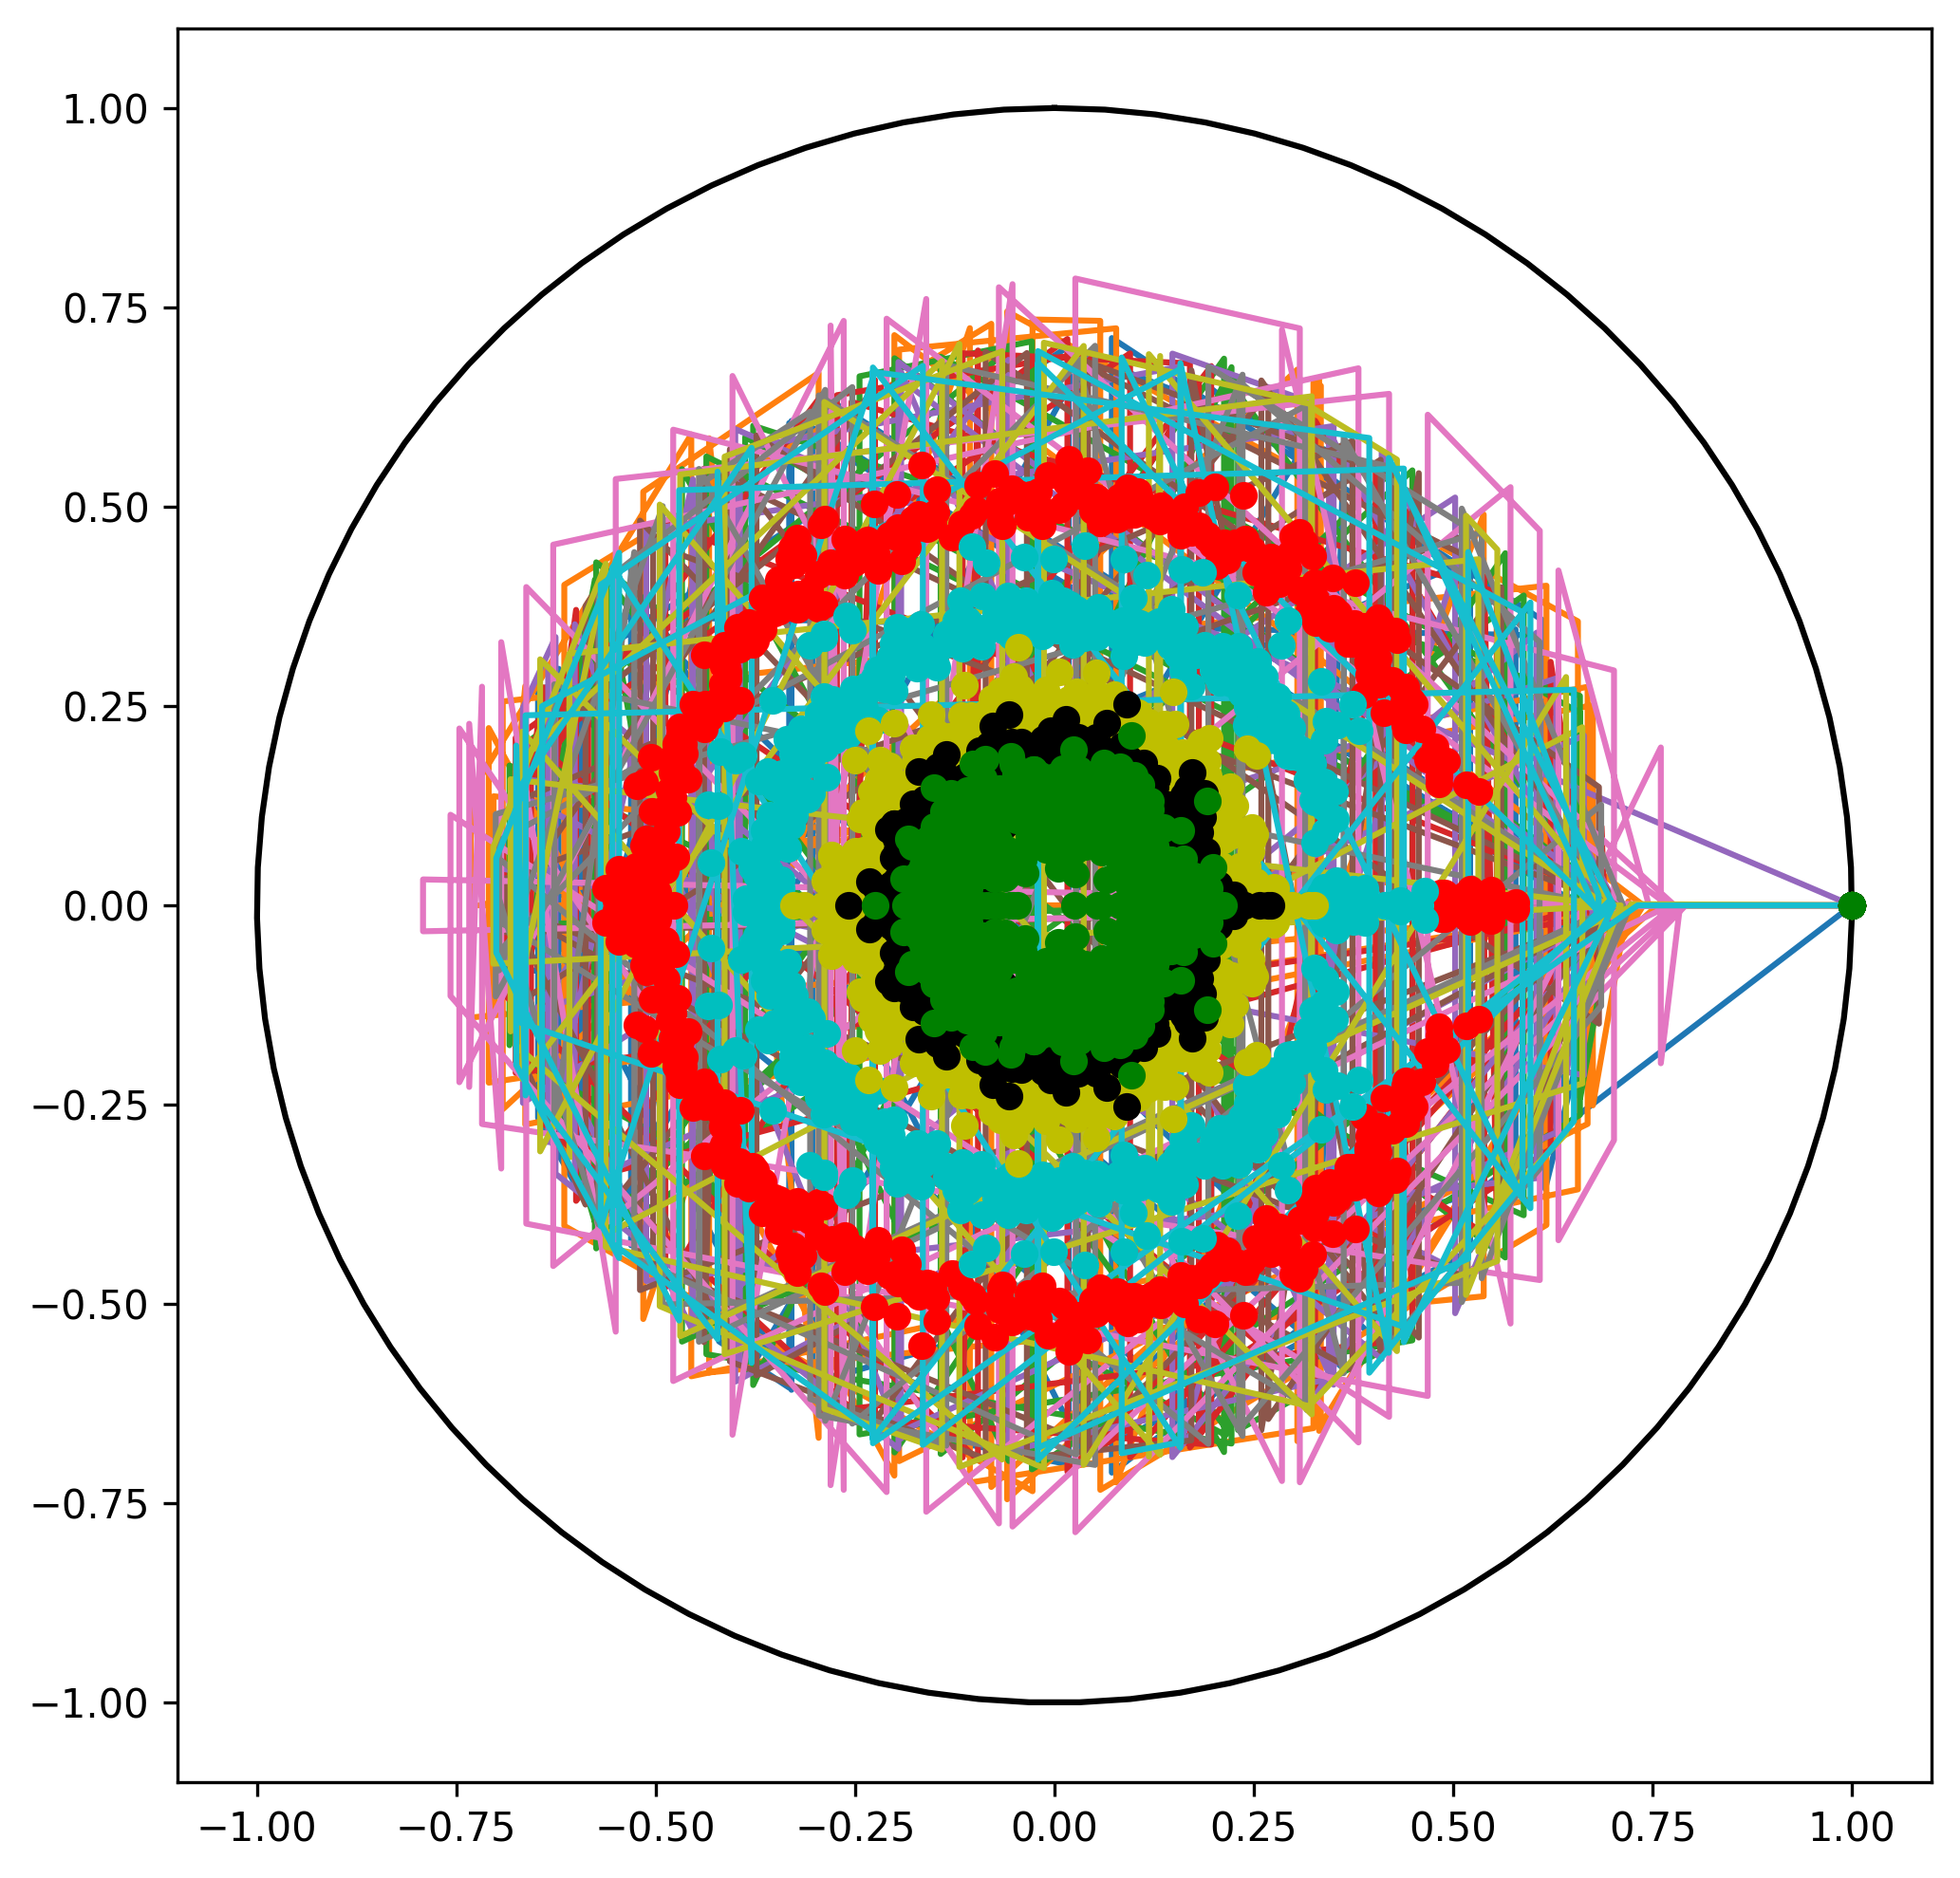

In [36]:
t = np.linspace(0, 2*np.pi, 100)
circle = [np.sin(t), np.cos(t)]

fig = plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)
plt.plot(*circle, "k")

for spectrum in spectrum_list1:
    plt.plot(spectrum[:,0], spectrum[:,1], "bo")
    
for spectrum in spectrum_list2:
    plt.plot(spectrum[:,0], spectrum[:,1], "ro")
    
for spectrum in spectrum_list3:
    plt.plot(spectrum[:,0], spectrum[:,1], "co")

for spectrum in spectrum_list4:
    plt.plot(spectrum[:,0], spectrum[:,1], "yo")
    
for spectrum in spectrum_list5:
    plt.plot(spectrum[:,0], spectrum[:,1], "ko")
    
for spectrum in spectrum_list6:
    plt.plot(spectrum[:,0], spectrum[:,1], "go")


plt.show()

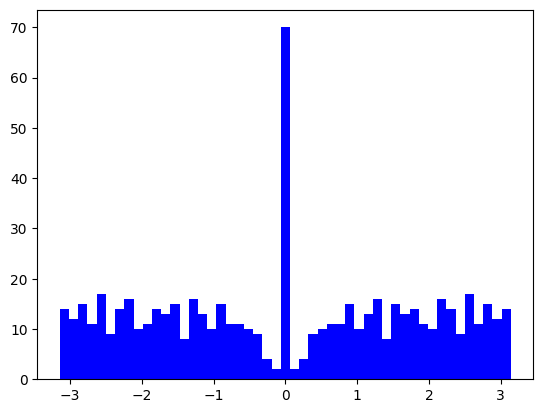

In [10]:
angular_histogram(spectrum_list1, bins=np.linspace(-np.pi, np.pi, 50))
plt.show()

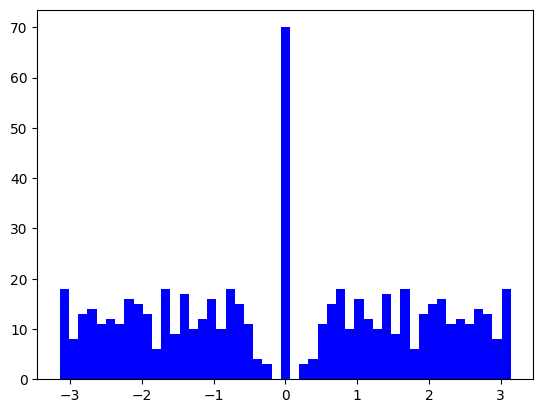

In [11]:
angular_histogram(spectrum_list2, bins=np.linspace(-np.pi, np.pi, 50))
plt.show()

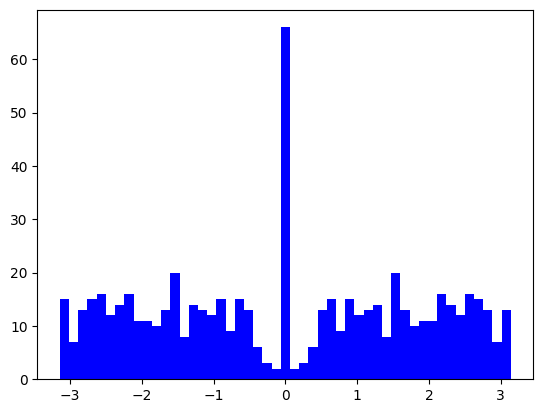

In [12]:
angular_histogram(spectrum_list3, bins=np.linspace(-np.pi, np.pi, 50))
plt.show()

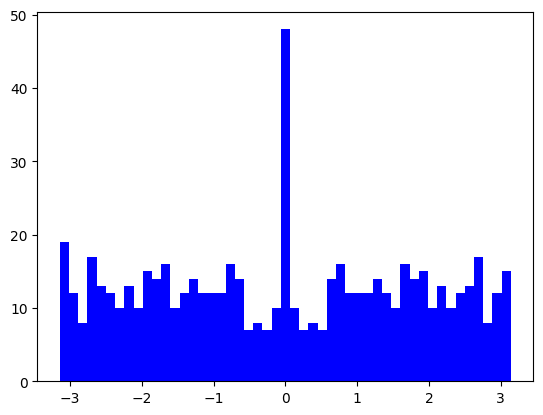

In [13]:
angular_histogram(spectrum_list4, bins=np.linspace(-np.pi, np.pi, 50))
plt.show()

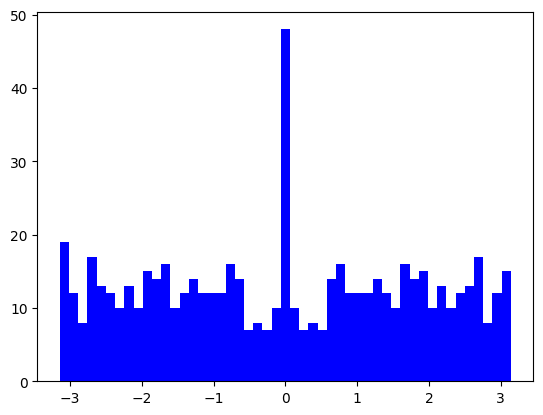

In [14]:
angular_histogram(spectrum_list4, bins=np.linspace(-np.pi, np.pi, 50))
plt.show()

In [20]:
R_p1, R_m1, R_pStd1, R_mStd1 = find_outer_inner_R([spectrum_list1[i][:-1] for i in range(10)])
R_p2, R_m2, R_pStd2, R_mStd2 = find_outer_inner_R([spectrum_list2[i][:-1] for i in range(10)])
R_p3, R_m3, R_pStd3, R_mStd3 = find_outer_inner_R([spectrum_list3[i][:-1] for i in range(10)])
R_p4, R_m4, R_pStd4, R_mStd4 = find_outer_inner_R([spectrum_list4[i][:-1] for i in range(10)])
R_p5, R_m5, R_pStd5, R_mStd5 = find_outer_inner_R([spectrum_list5[i][:-1] for i in range(10)])
R_p6, R_m6, R_pStd6, R_mStd6 = find_outer_inner_R([spectrum_list6[i][:-1] for i in range(10)])

In [30]:
x = [8, 16, 24, 32, 40, 48]
R_plus = [R_p1, R_p2, R_p3, R_p4, R_p5, R_p6]
R_minus = [R_m1, R_m2, R_m3, R_m4, R_m5, R_m6]
R_plus_std = [R_pStd1, R_pStd2, R_pStd3, R_pStd4, R_pStd5, R_pStd6]
R_minus_std = [R_mStd1, R_mStd2, R_mStd3, R_mStd4, R_mStd5, R_mStd6]

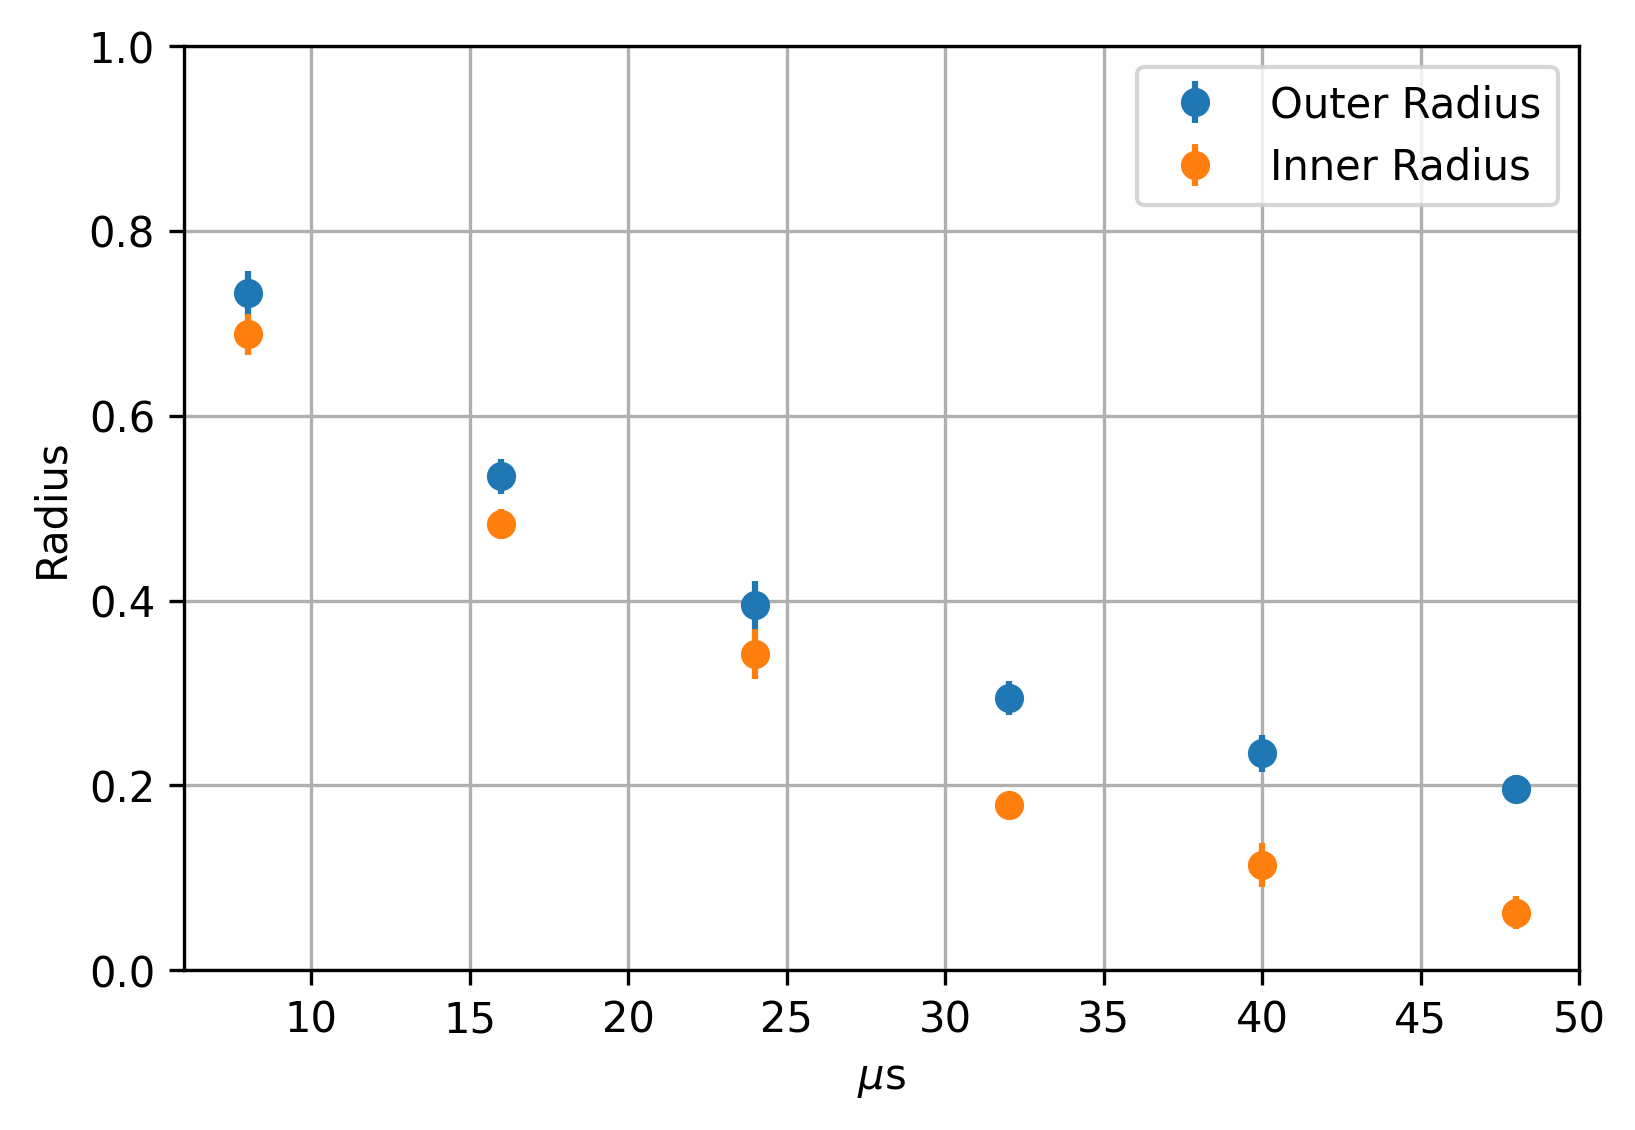

In [31]:
fig = plt.figure(figsize=(6,4), dpi = 300, facecolor='w', edgecolor='k')

plt.errorbar(x, R_plus, yerr=R_plus_std, fmt="o")
plt.errorbar(x, R_minus, yerr=R_minus_std, fmt="o")
plt.ylim([0,1])
plt.grid()
plt.xlabel("$\mu$s")
plt.ylabel("Radius")
plt.legend(["Outer Radius", "Inner Radius"])
plt.show()

### Angular Distribution

In [38]:
angular_histogram(spectrum1_list, bins=np.linspace(-np.pi, np.pi))
plt.show()
angular_histogram(spectrum3_list, bins=np.linspace(-np.pi, np.pi))
plt.show()
angular_histogram(spectrum6_list, bins=np.linspace(-np.pi, np.pi))
plt.show()

NameError: name 'spectrum1_list' is not defined

## Three Qubits, Spectra

C:\Users\krisw\AppData\Local\Temp\ipykernel_26008\3442451697.py:12: UserWarning: The label '_' of <matplotlib.lines.Line2D object at 0x000001FCB3FF2BC0> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_","No Delay","5$\mu$","10$\mu$", "15$\mu$","20$\mu$", "25$\mu$"], loc = "upper right")


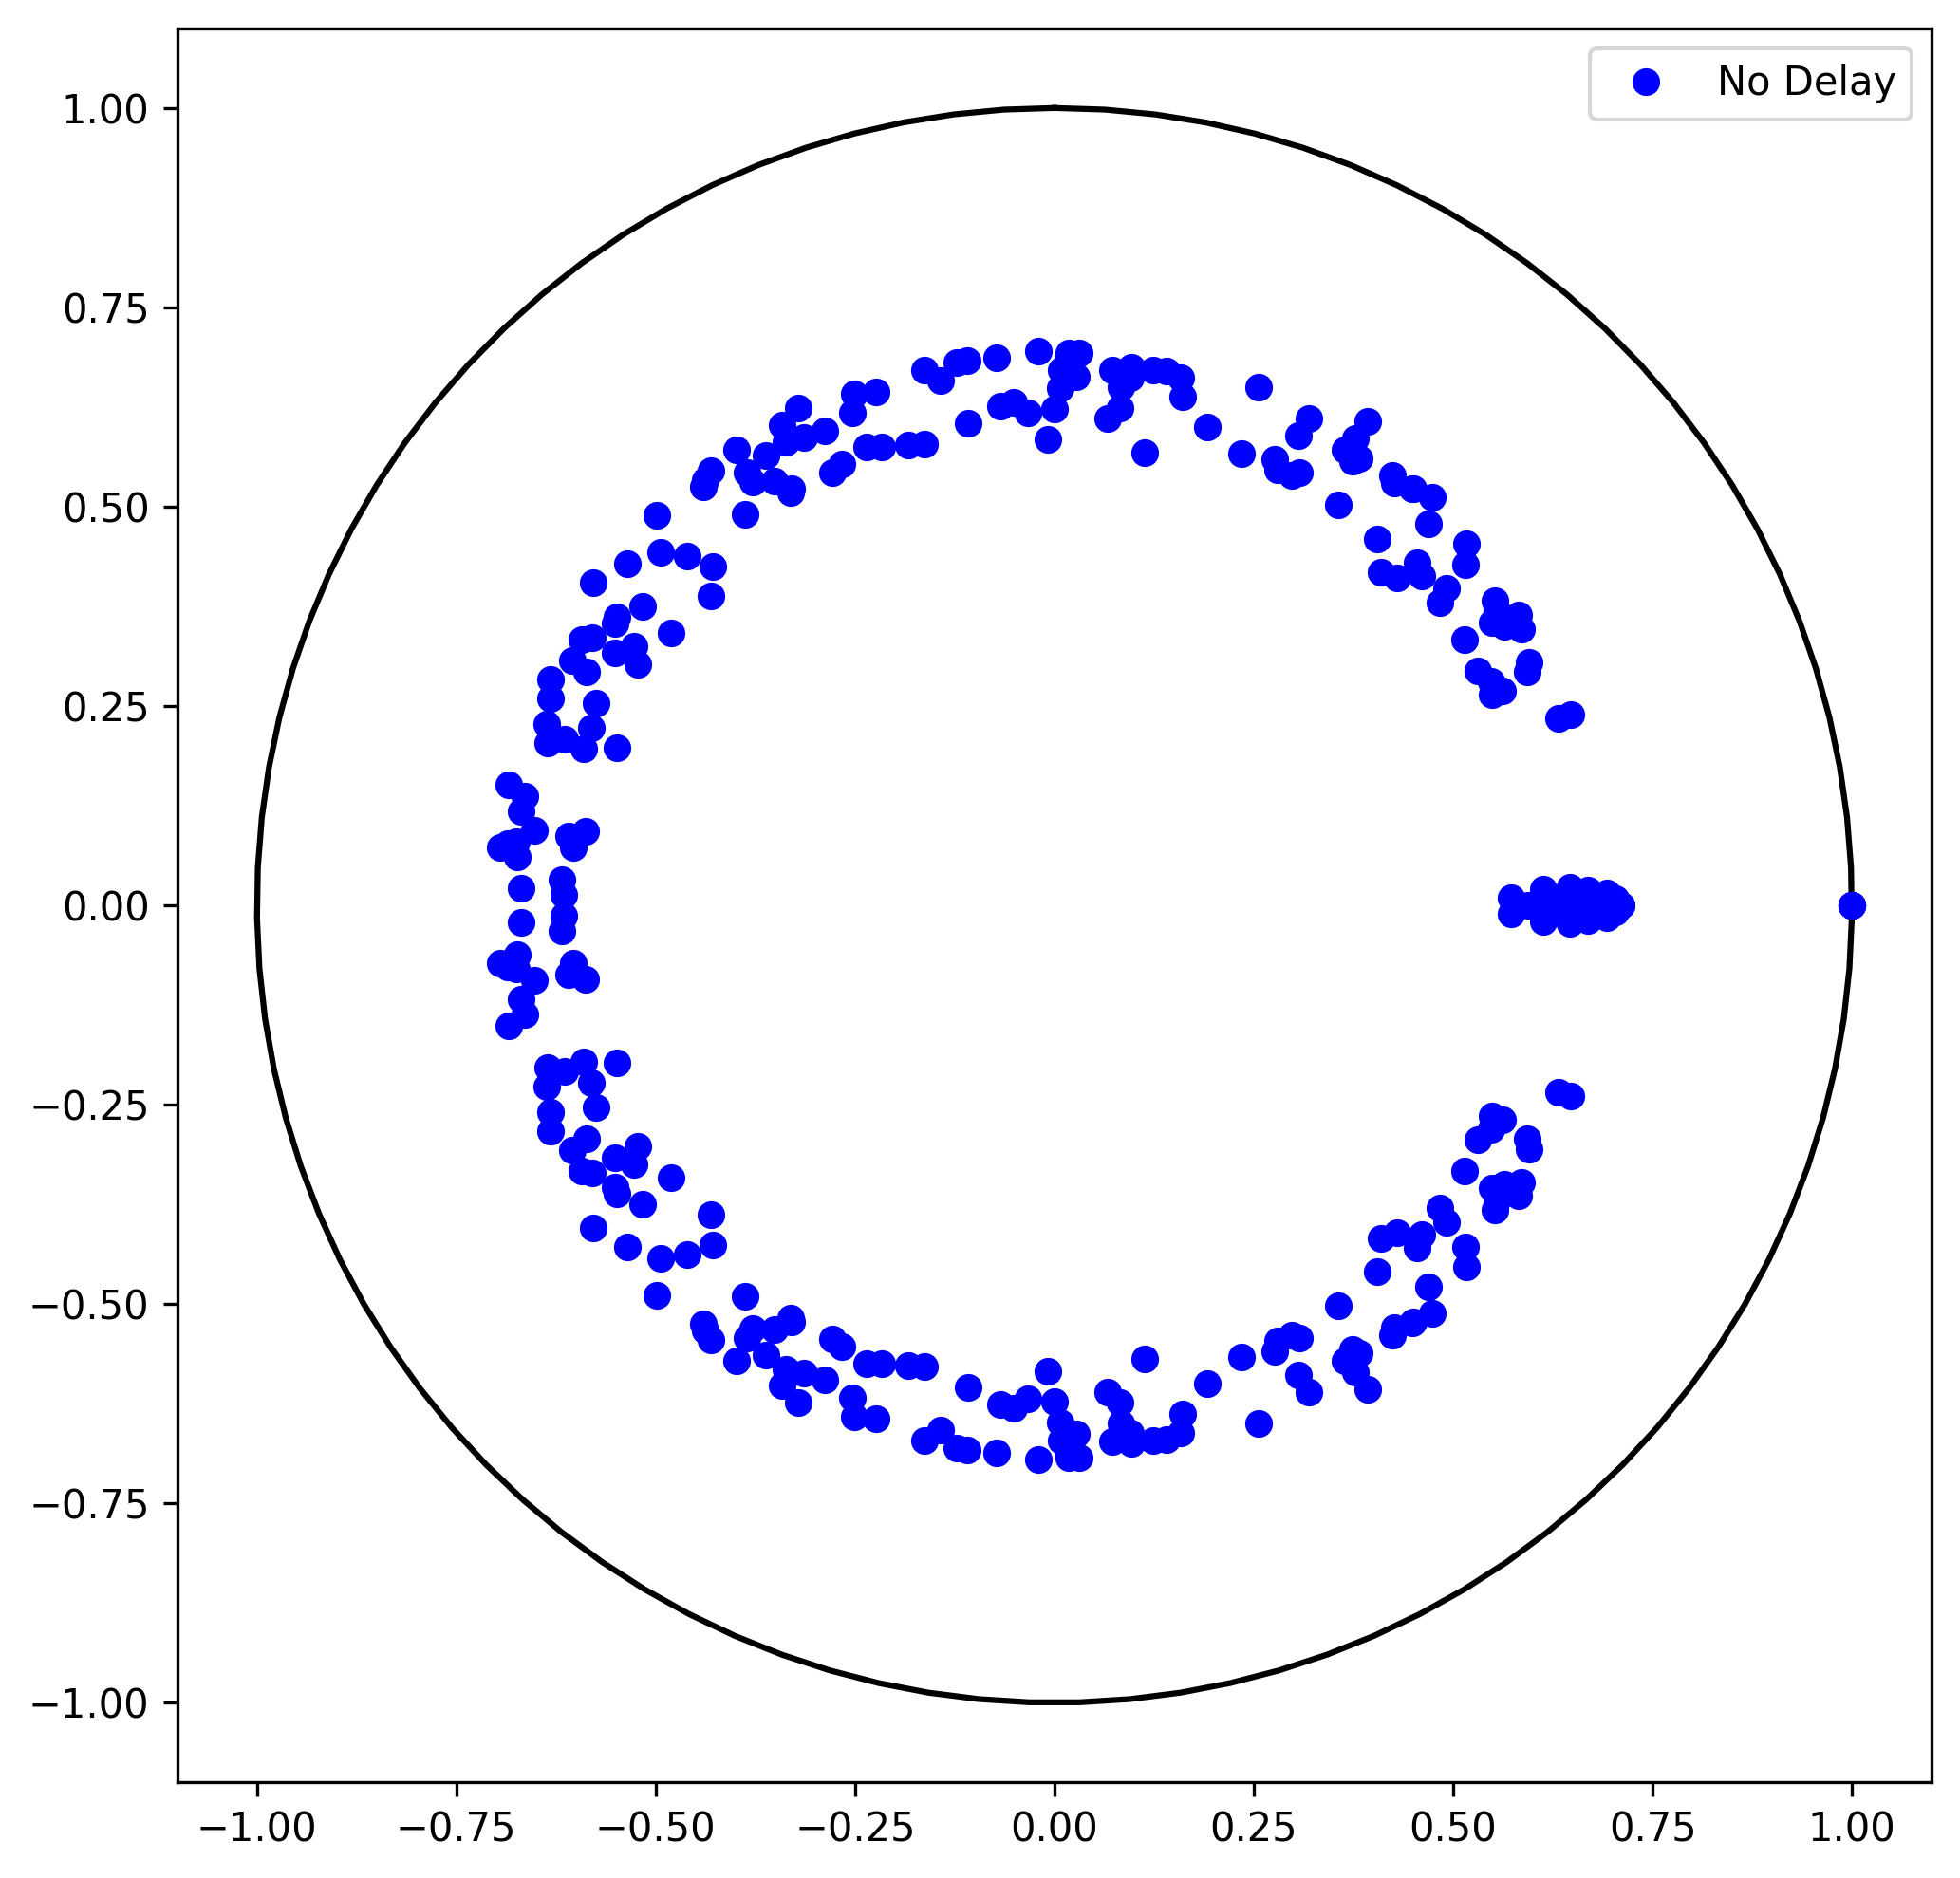

In [30]:
fig = plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)
plt.plot(*circle, "k")

spectrum1 = [np.concatenate([spectrum[:,0] for spectrum in spectrum1_list]), np.concatenate([spectrum[:,1] for spectrum in spectrum1_list])]

#for spectrum in spectrum1_list:
#    plt.plot(spectrum[:,0], spectrum[:,1], "bo")
plt.plot(*spectrum1, "bo")
    
plt.legend(["_","No Delay","5$\mu$","10$\mu$", "15$\mu$","20$\mu$", "25$\mu$"], loc = "upper right")

plt.show()

C:\Users\krisw\AppData\Local\Temp\ipykernel_26008\2241957620.py:13: UserWarning: The label '_' of <matplotlib.lines.Line2D object at 0x000001FCA4662350> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_","No Delay","5$\mu$s Delay","10$\mu$ s Delay", "15$\mu$ s Delay","20$\mu$ s Delay", "25$\mu$ s Delay"], loc = "upper right")


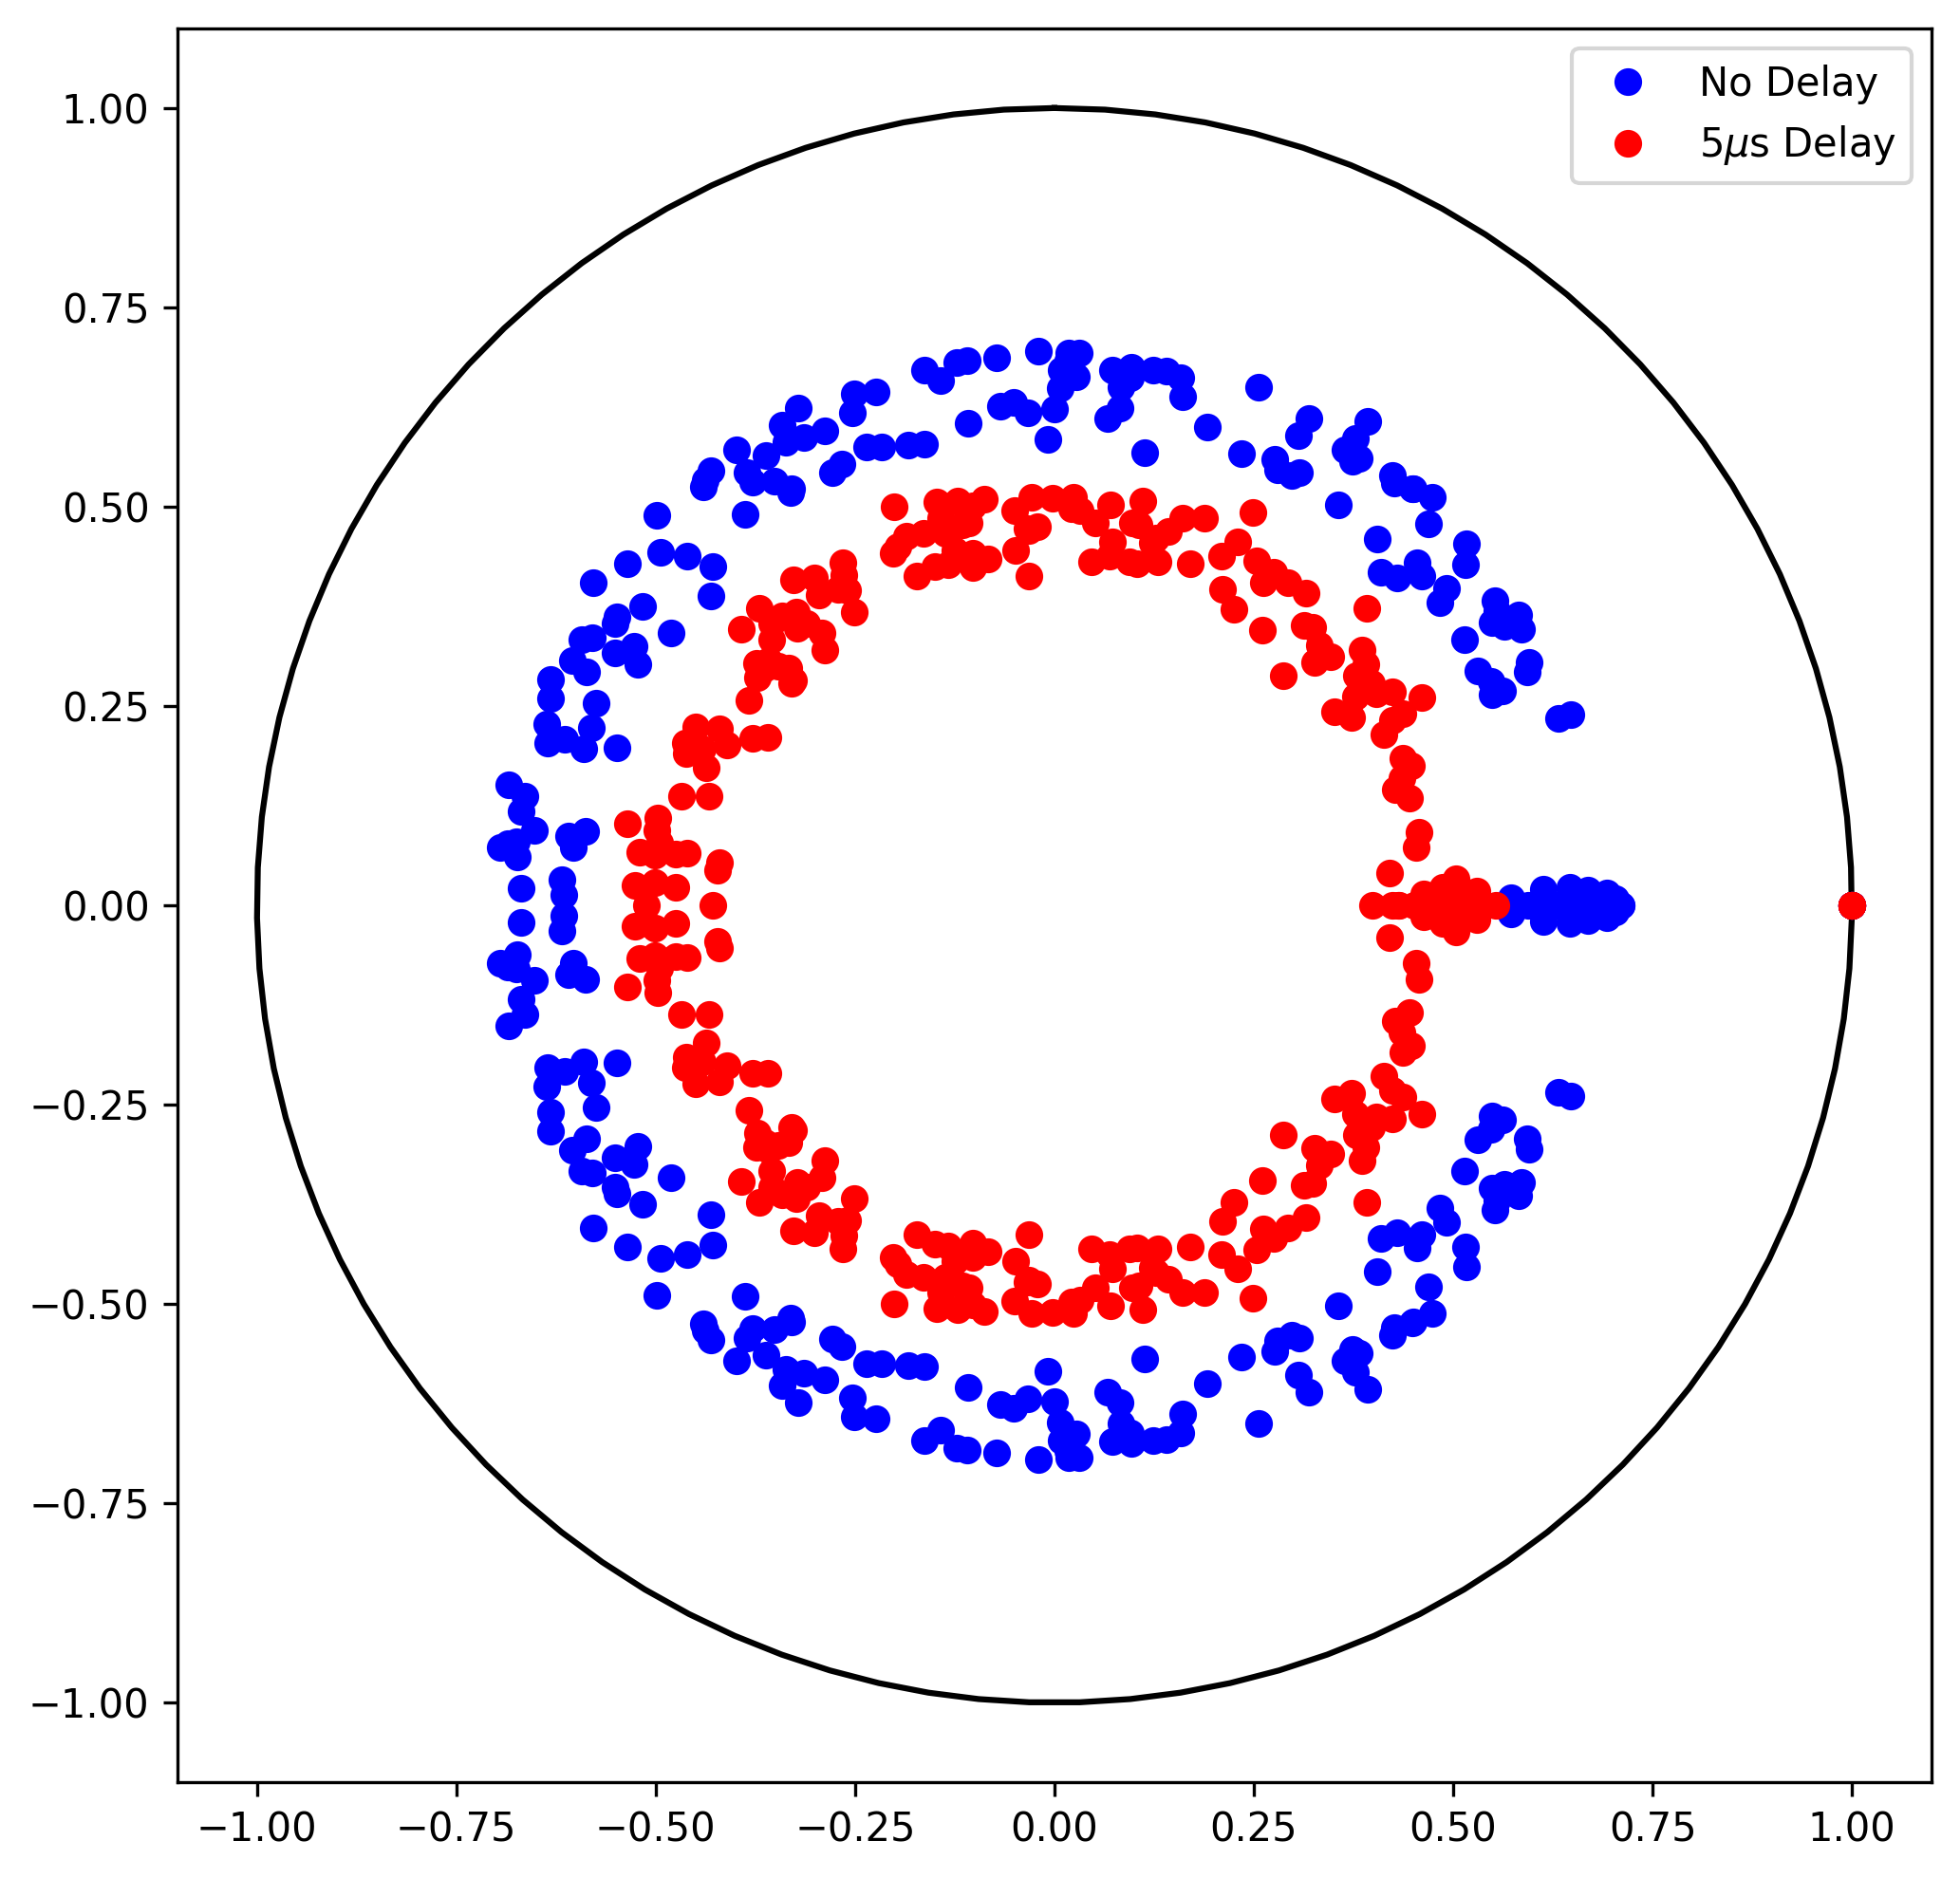

In [128]:
fig = plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)
plt.plot(*circle, "k")

spectrum2 = [np.concatenate([spectrum[:,0] for spectrum in spectrum2_list]), np.concatenate([spectrum[:,1] for spectrum in spectrum2_list])]

#for spectrum in spectrum1_list:
#    plt.plot(spectrum[:,0], spectrum[:,1], "bo")
plt.plot(*spectrum1, "bo")
plt.plot(*spectrum2, "ro")
    
plt.legend(["_","No Delay","5$\mu$s Delay","10$\mu$ s Delay", "15$\mu$ s Delay","20$\mu$ s Delay", "25$\mu$ s Delay"], loc = "upper right")

plt.show()

C:\Users\krisw\AppData\Local\Temp\ipykernel_26008\1784452718.py:14: UserWarning: The label '_' of <matplotlib.lines.Line2D object at 0x000001FC85EF0BE0> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_","No Delay","5$\mu$s Delay","10$\mu$s Delay", "15$\mu$s Delay","20$\mu$s Delay", "25$\mu$s Delay"], loc = "upper right")


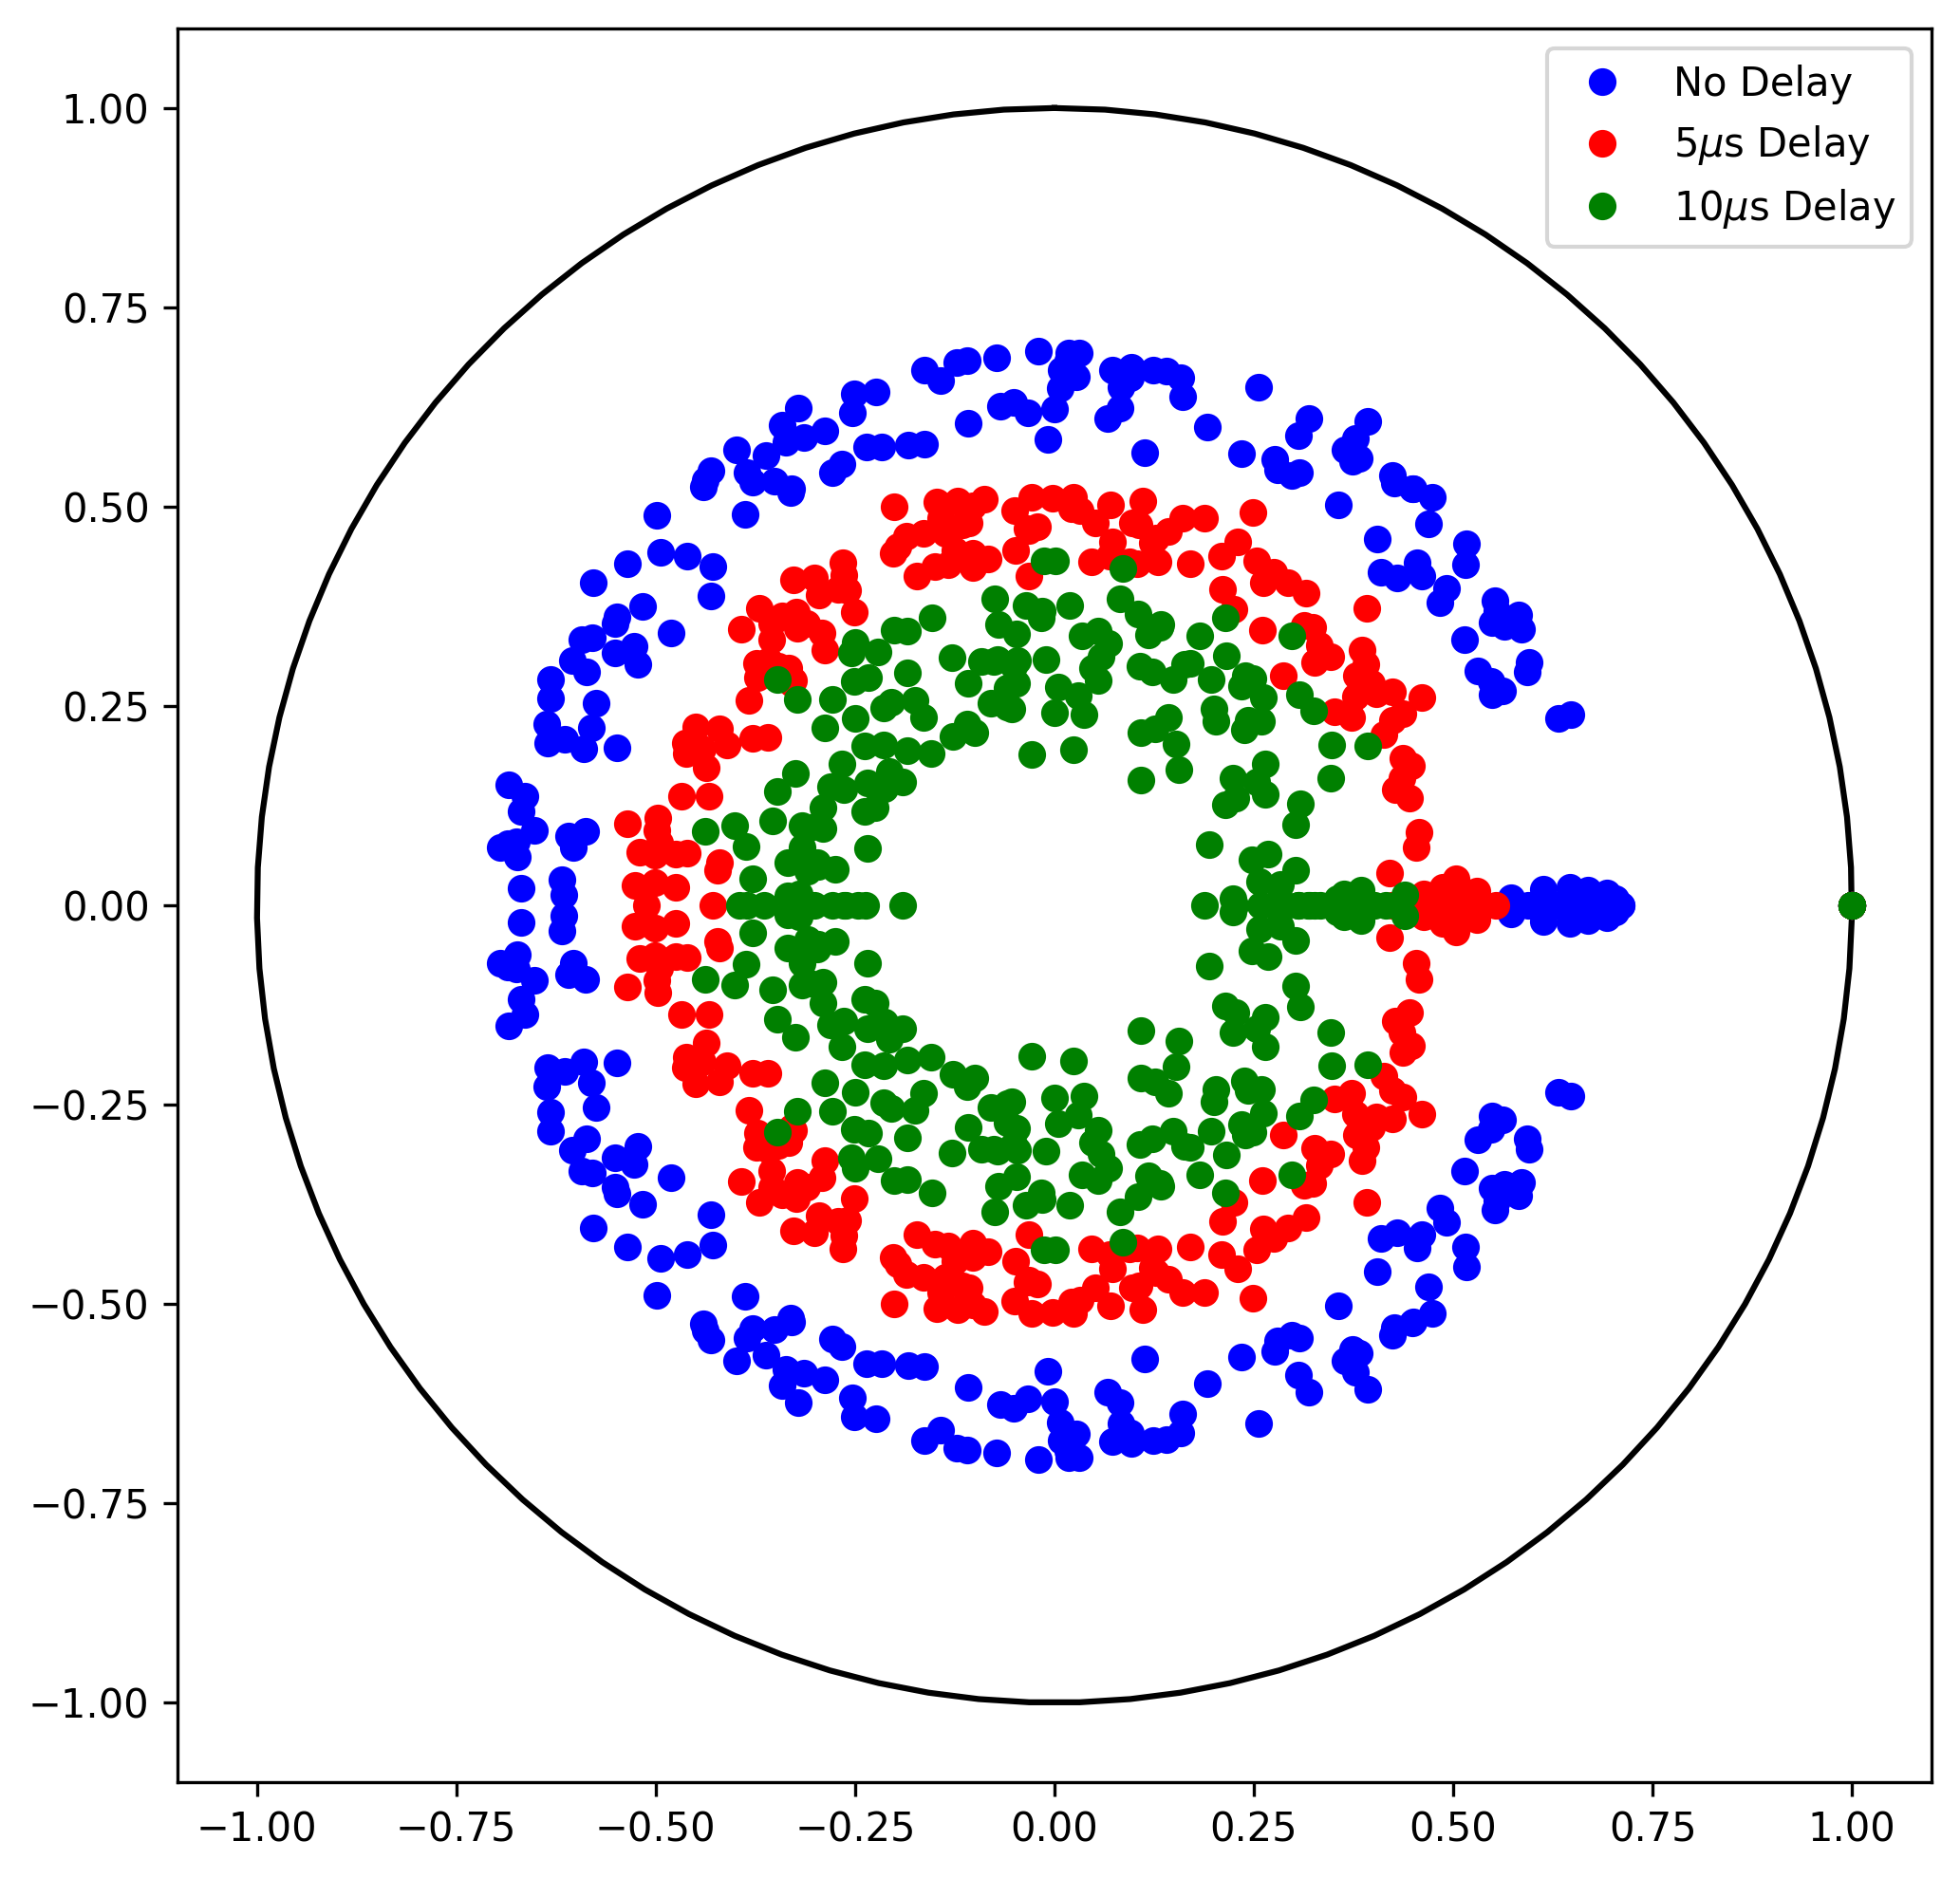

In [129]:
fig = plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)
plt.plot(*circle, "k")

spectrum3 = [np.concatenate([spectrum[:,0] for spectrum in spectrum3_list]), np.concatenate([spectrum[:,1] for spectrum in spectrum3_list])]

#for spectrum in spectrum1_list:
#    plt.plot(spectrum[:,0], spectrum[:,1], "bo")
plt.plot(*spectrum1, "bo")
plt.plot(*spectrum2, "ro")
plt.plot(*spectrum3, "go")
    
plt.legend(["_","No Delay","5$\mu$s Delay","10$\mu$s Delay", "15$\mu$s Delay","20$\mu$s Delay", "25$\mu$s Delay"], loc = "upper right")

plt.show()

C:\Users\krisw\AppData\Local\Temp\ipykernel_26008\2632584600.py:15: UserWarning: The label '_' of <matplotlib.lines.Line2D object at 0x000001FCA4601150> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_","No Delay","5$\mu$s Delay","10$\mu$s Delay", "15$\mu$s Delay","20$\mu$s Delay", "25$\mu$s Delay"], loc = "upper right")


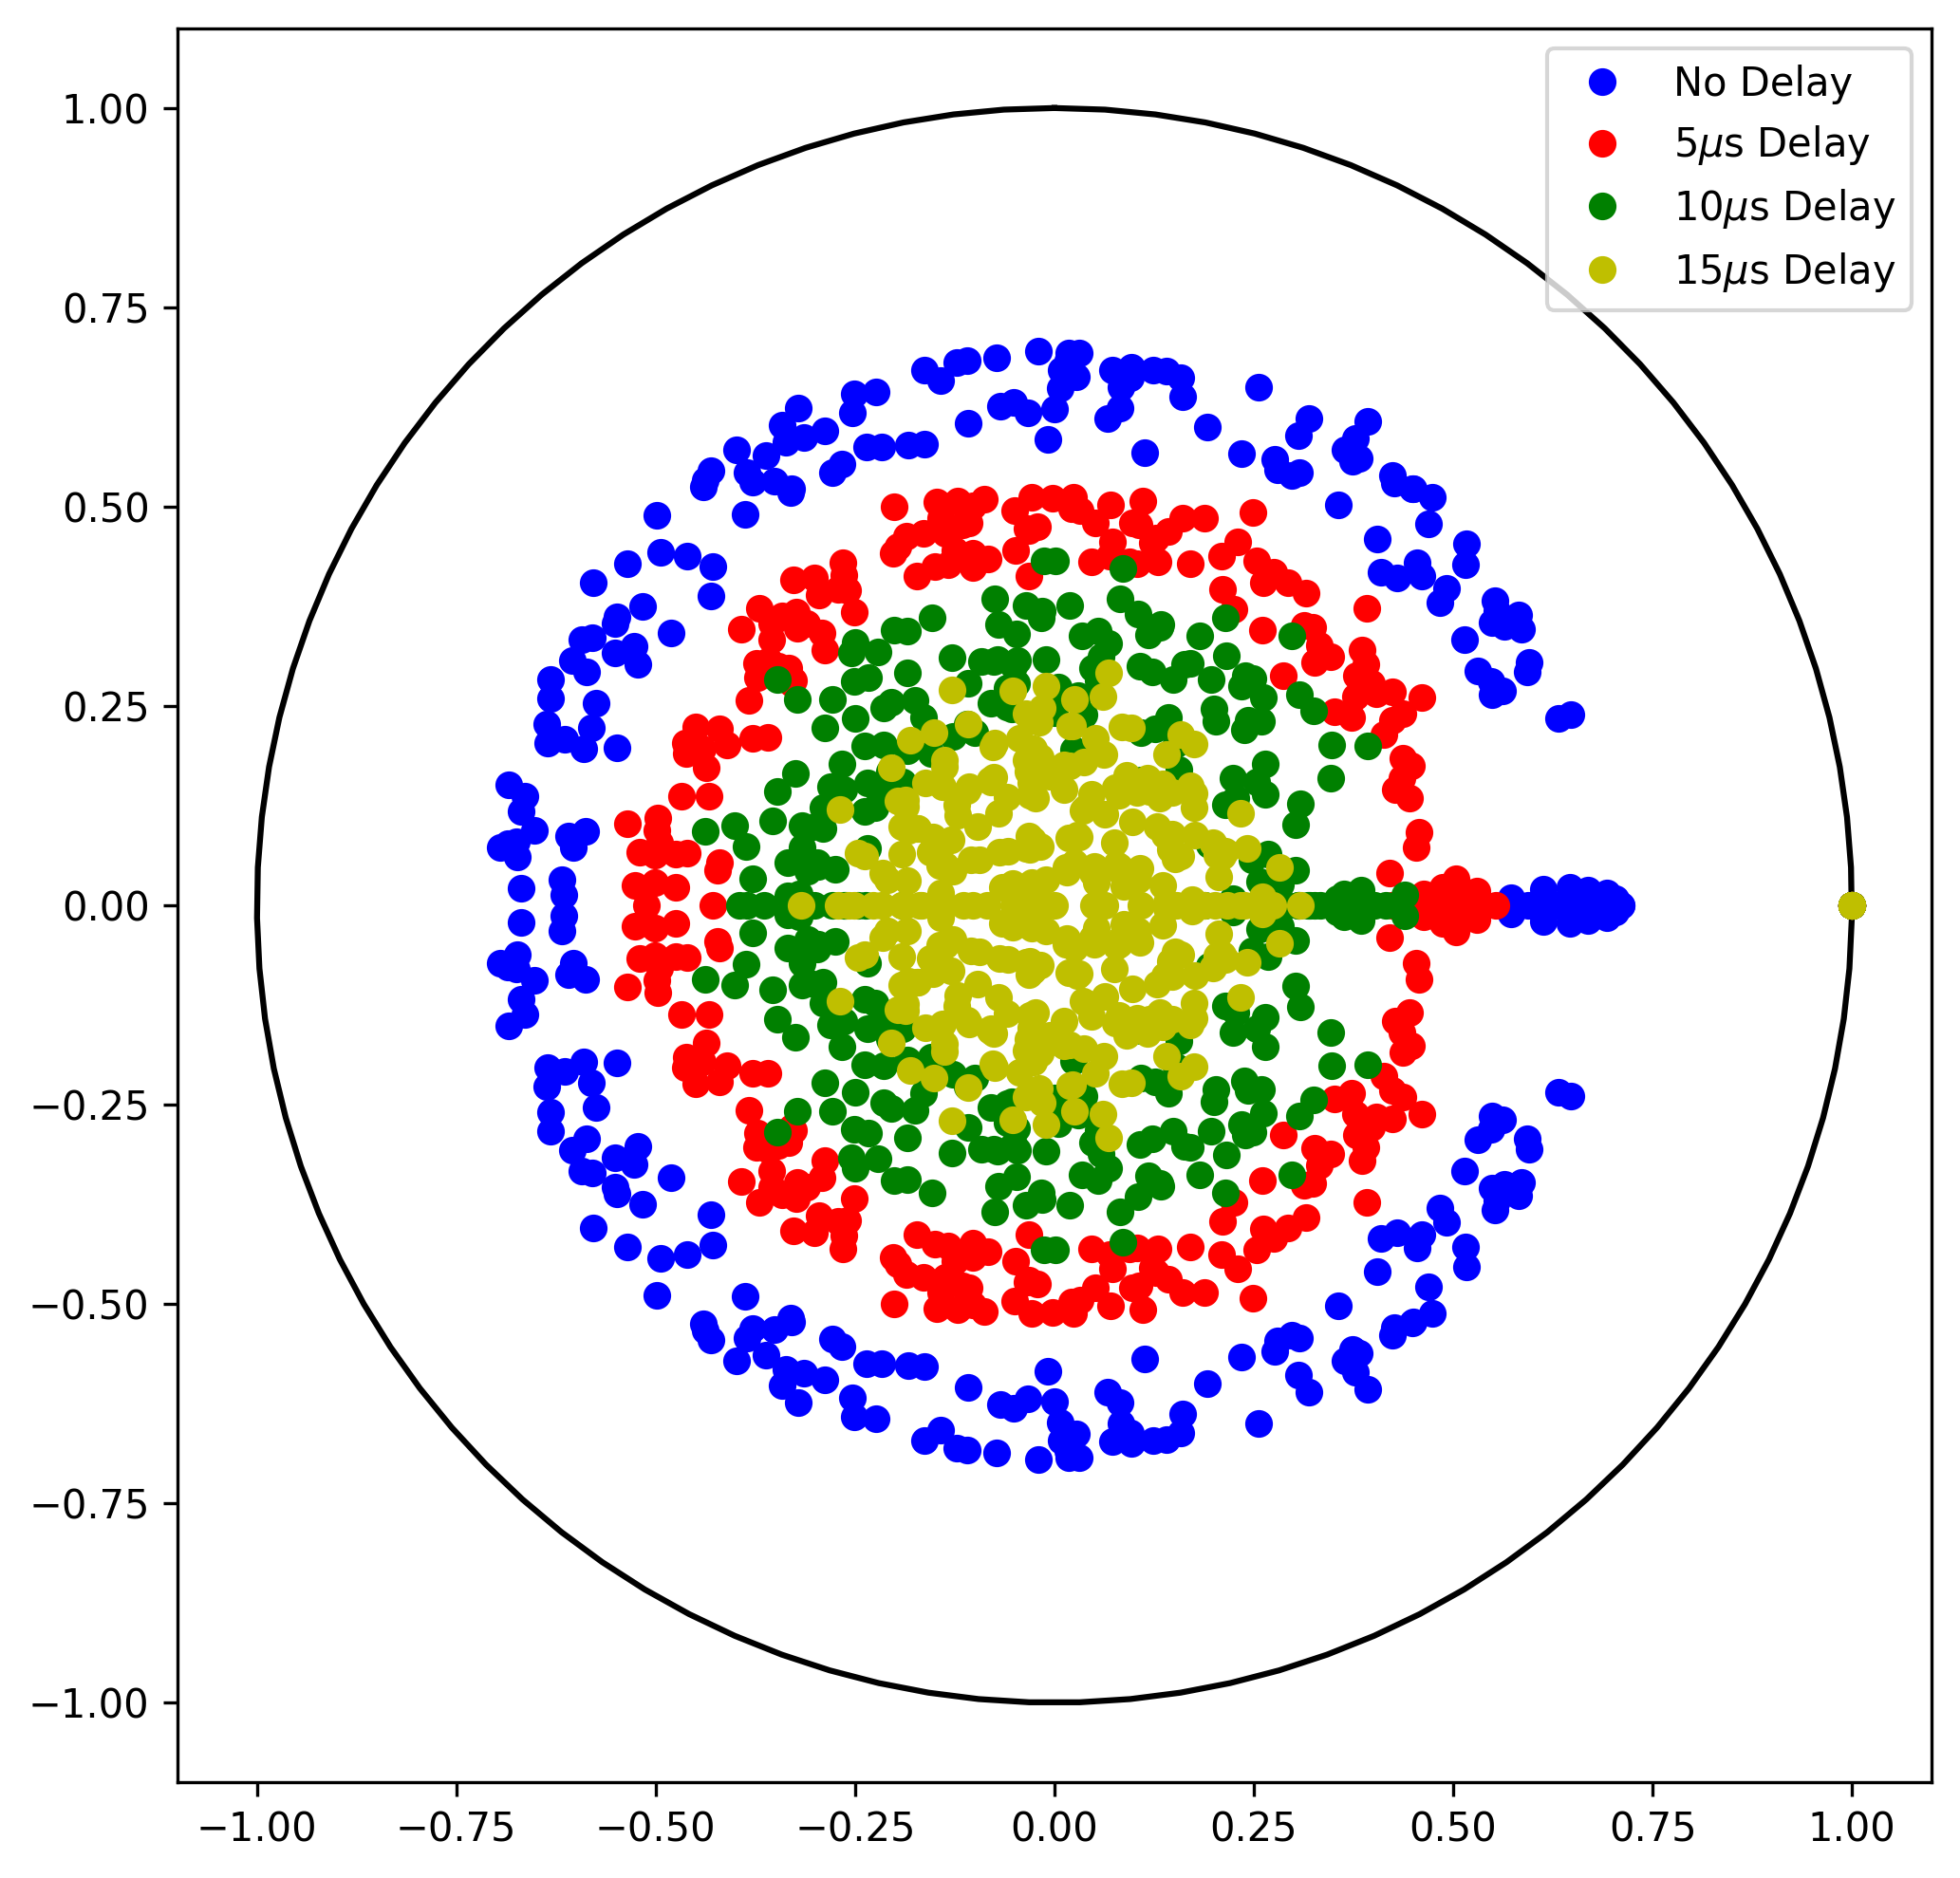

In [130]:
fig = plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)
plt.plot(*circle, "k")

spectrum4 = [np.concatenate([spectrum[:,0] for spectrum in spectrum4_list]), np.concatenate([spectrum[:,1] for spectrum in spectrum4_list])]

#for spectrum in spectrum1_list:
#    plt.plot(spectrum[:,0], spectrum[:,1], "bo")
plt.plot(*spectrum1, "bo")
plt.plot(*spectrum2, "ro")
plt.plot(*spectrum3, "go")
plt.plot(*spectrum4, "yo")
    
plt.legend(["_","No Delay","5$\mu$s Delay","10$\mu$s Delay", "15$\mu$s Delay","20$\mu$s Delay", "25$\mu$s Delay"], loc = "upper right")

plt.show()

C:\Users\krisw\AppData\Local\Temp\ipykernel_26008\117887113.py:16: UserWarning: The label '_' of <matplotlib.lines.Line2D object at 0x000001FCB40C3130> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_","No Delay","5$\mu$s Delay","10$\mu$s Delay", "15$\mu$s Delay","20$\mu$s Delay", "25$\mu$s Delay"], loc = "upper right")


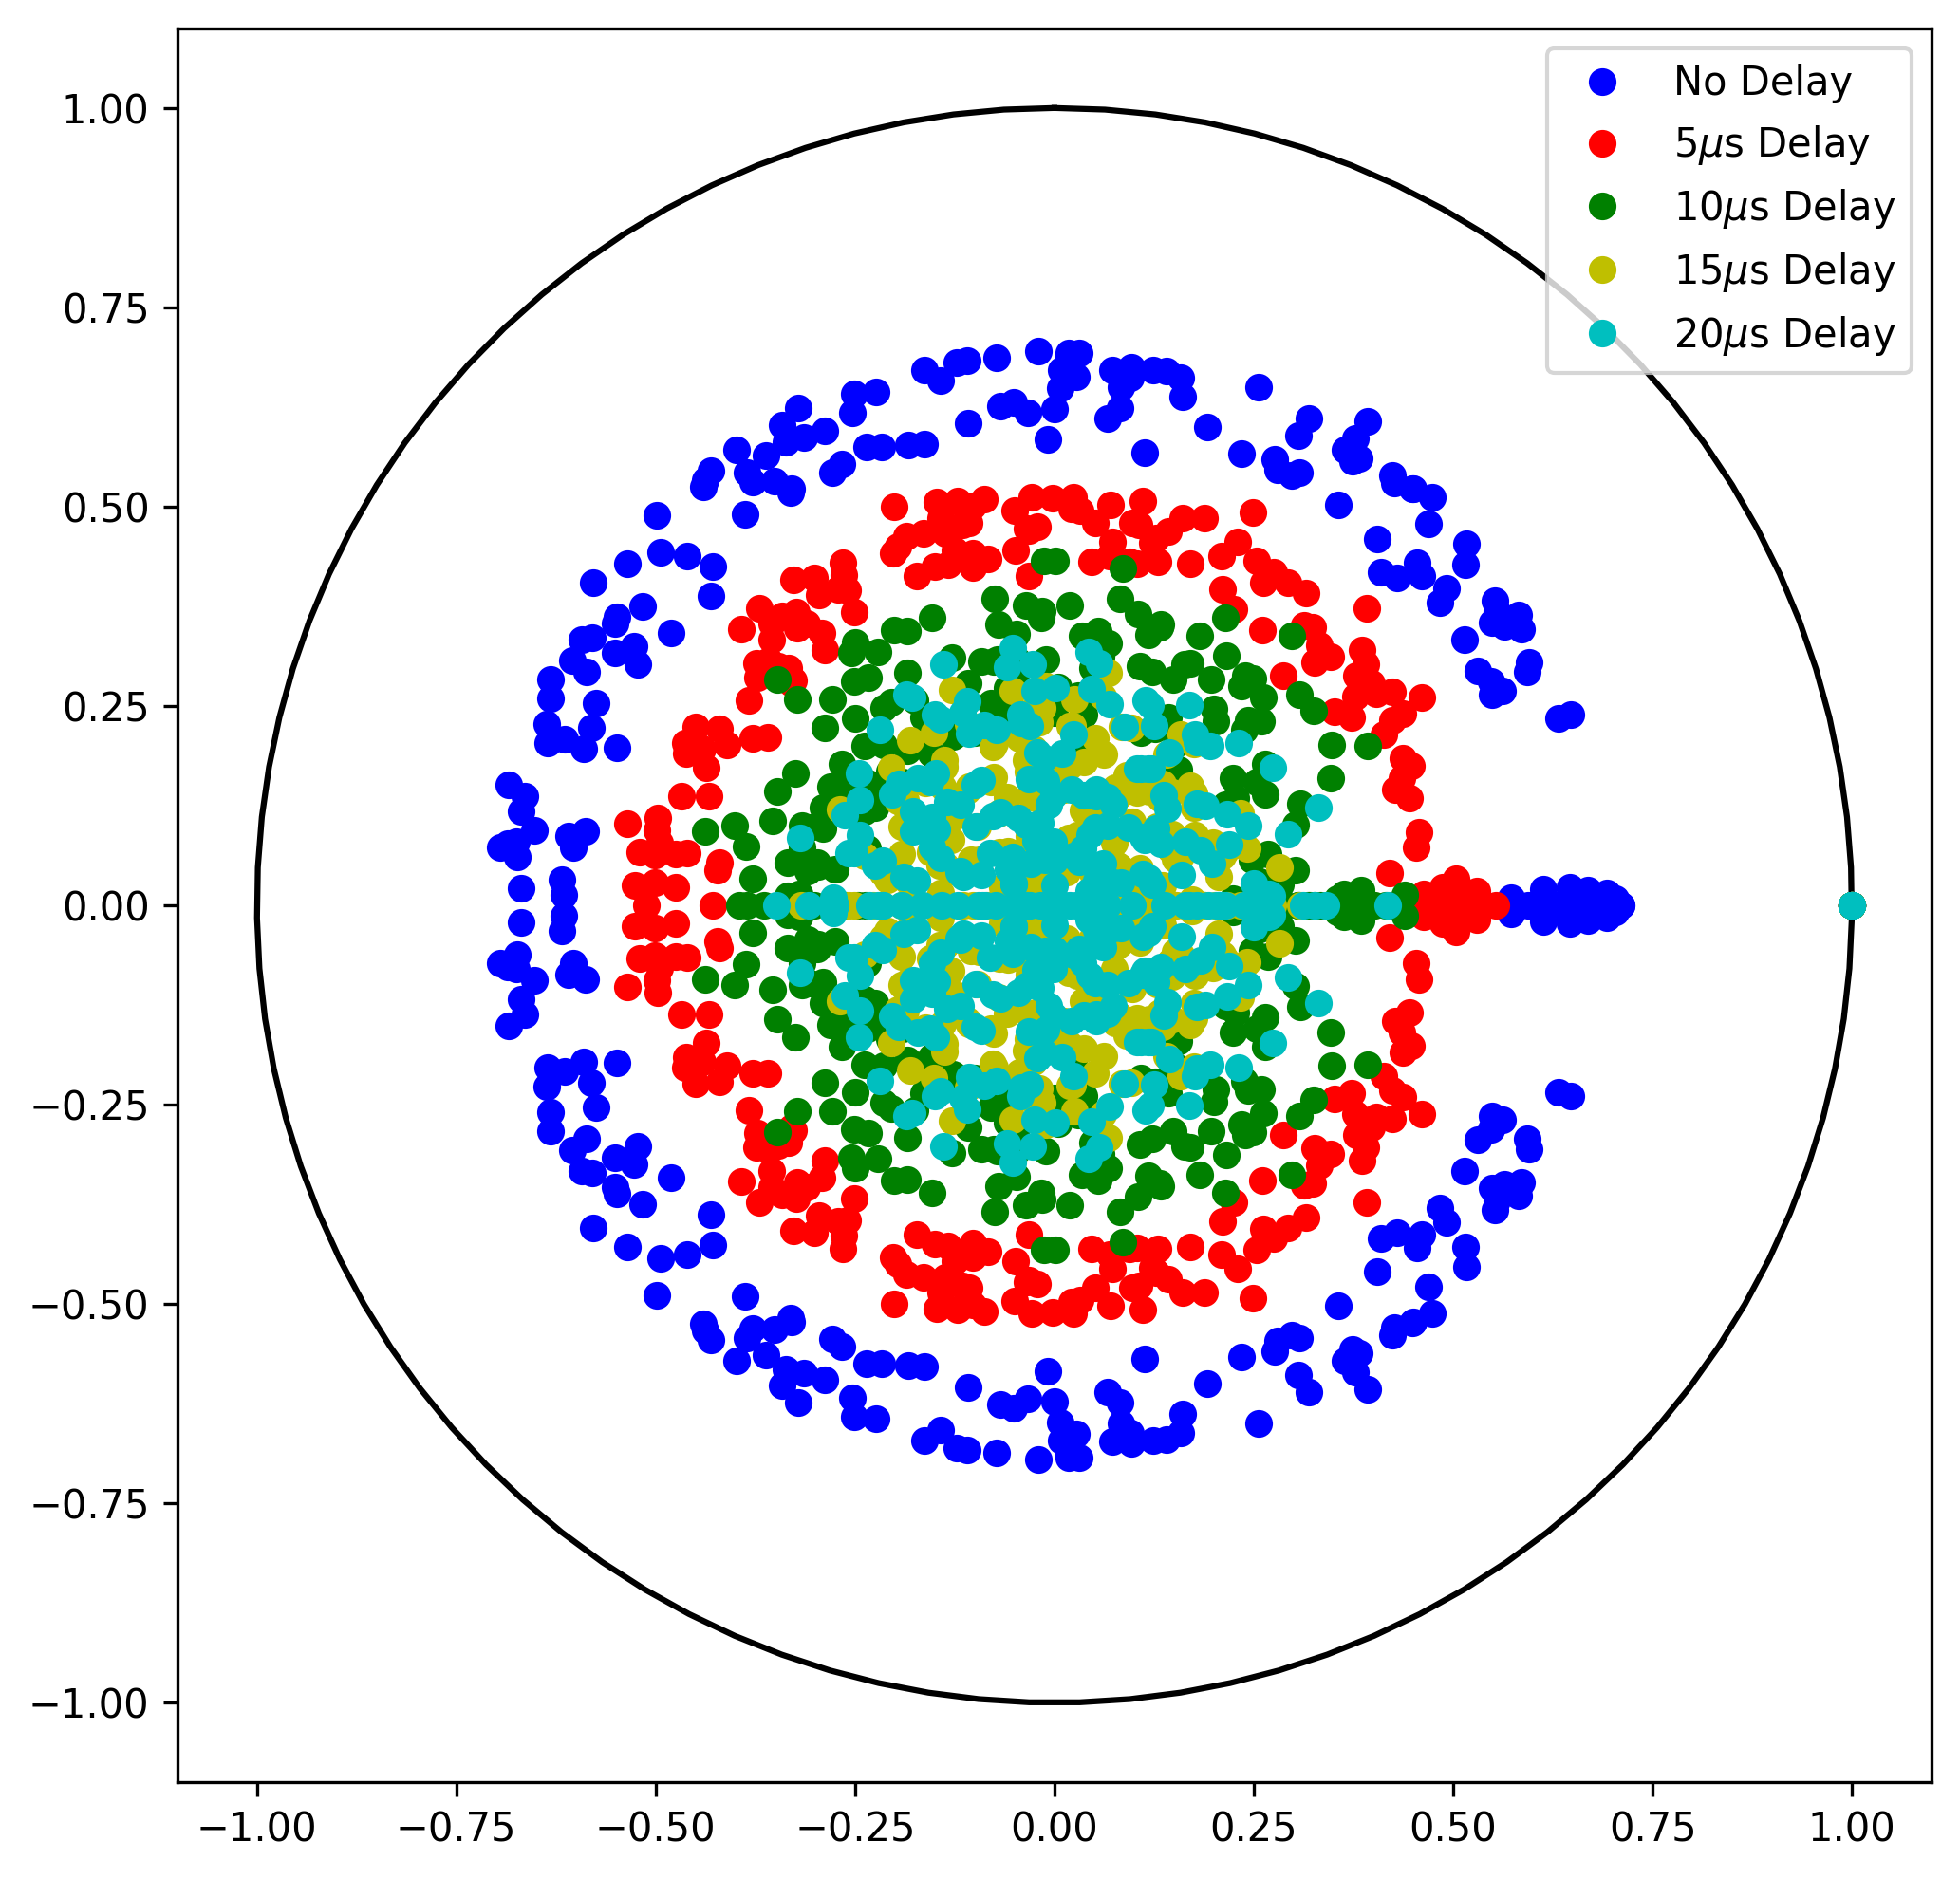

In [131]:
fig = plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)
plt.plot(*circle, "k")

spectrum5 = [np.concatenate([spectrum[:,0] for spectrum in spectrum5_list]), np.concatenate([spectrum[:,1] for spectrum in spectrum5_list])]

#for spectrum in spectrum1_list:
#    plt.plot(spectrum[:,0], spectrum[:,1], "bo")
plt.plot(*spectrum1, "bo")
plt.plot(*spectrum2, "ro")
plt.plot(*spectrum3, "go")
plt.plot(*spectrum4, "yo")
plt.plot(*spectrum5, "co")
    
plt.legend(["_","No Delay","5$\mu$s Delay","10$\mu$s Delay", "15$\mu$s Delay","20$\mu$s Delay", "25$\mu$s Delay"], loc = "upper right")

plt.show()

C:\Users\krisw\AppData\Local\Temp\ipykernel_26008\84990657.py:17: UserWarning: The label '_' of <matplotlib.lines.Line2D object at 0x000001FC84556B60> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_","No Delay","5$\mu$s Delay","10$\mu$s Delay", "15$\mu$s Delay","20$\mu$s Delay", "25$\mu$s Delay"], loc = "upper right")


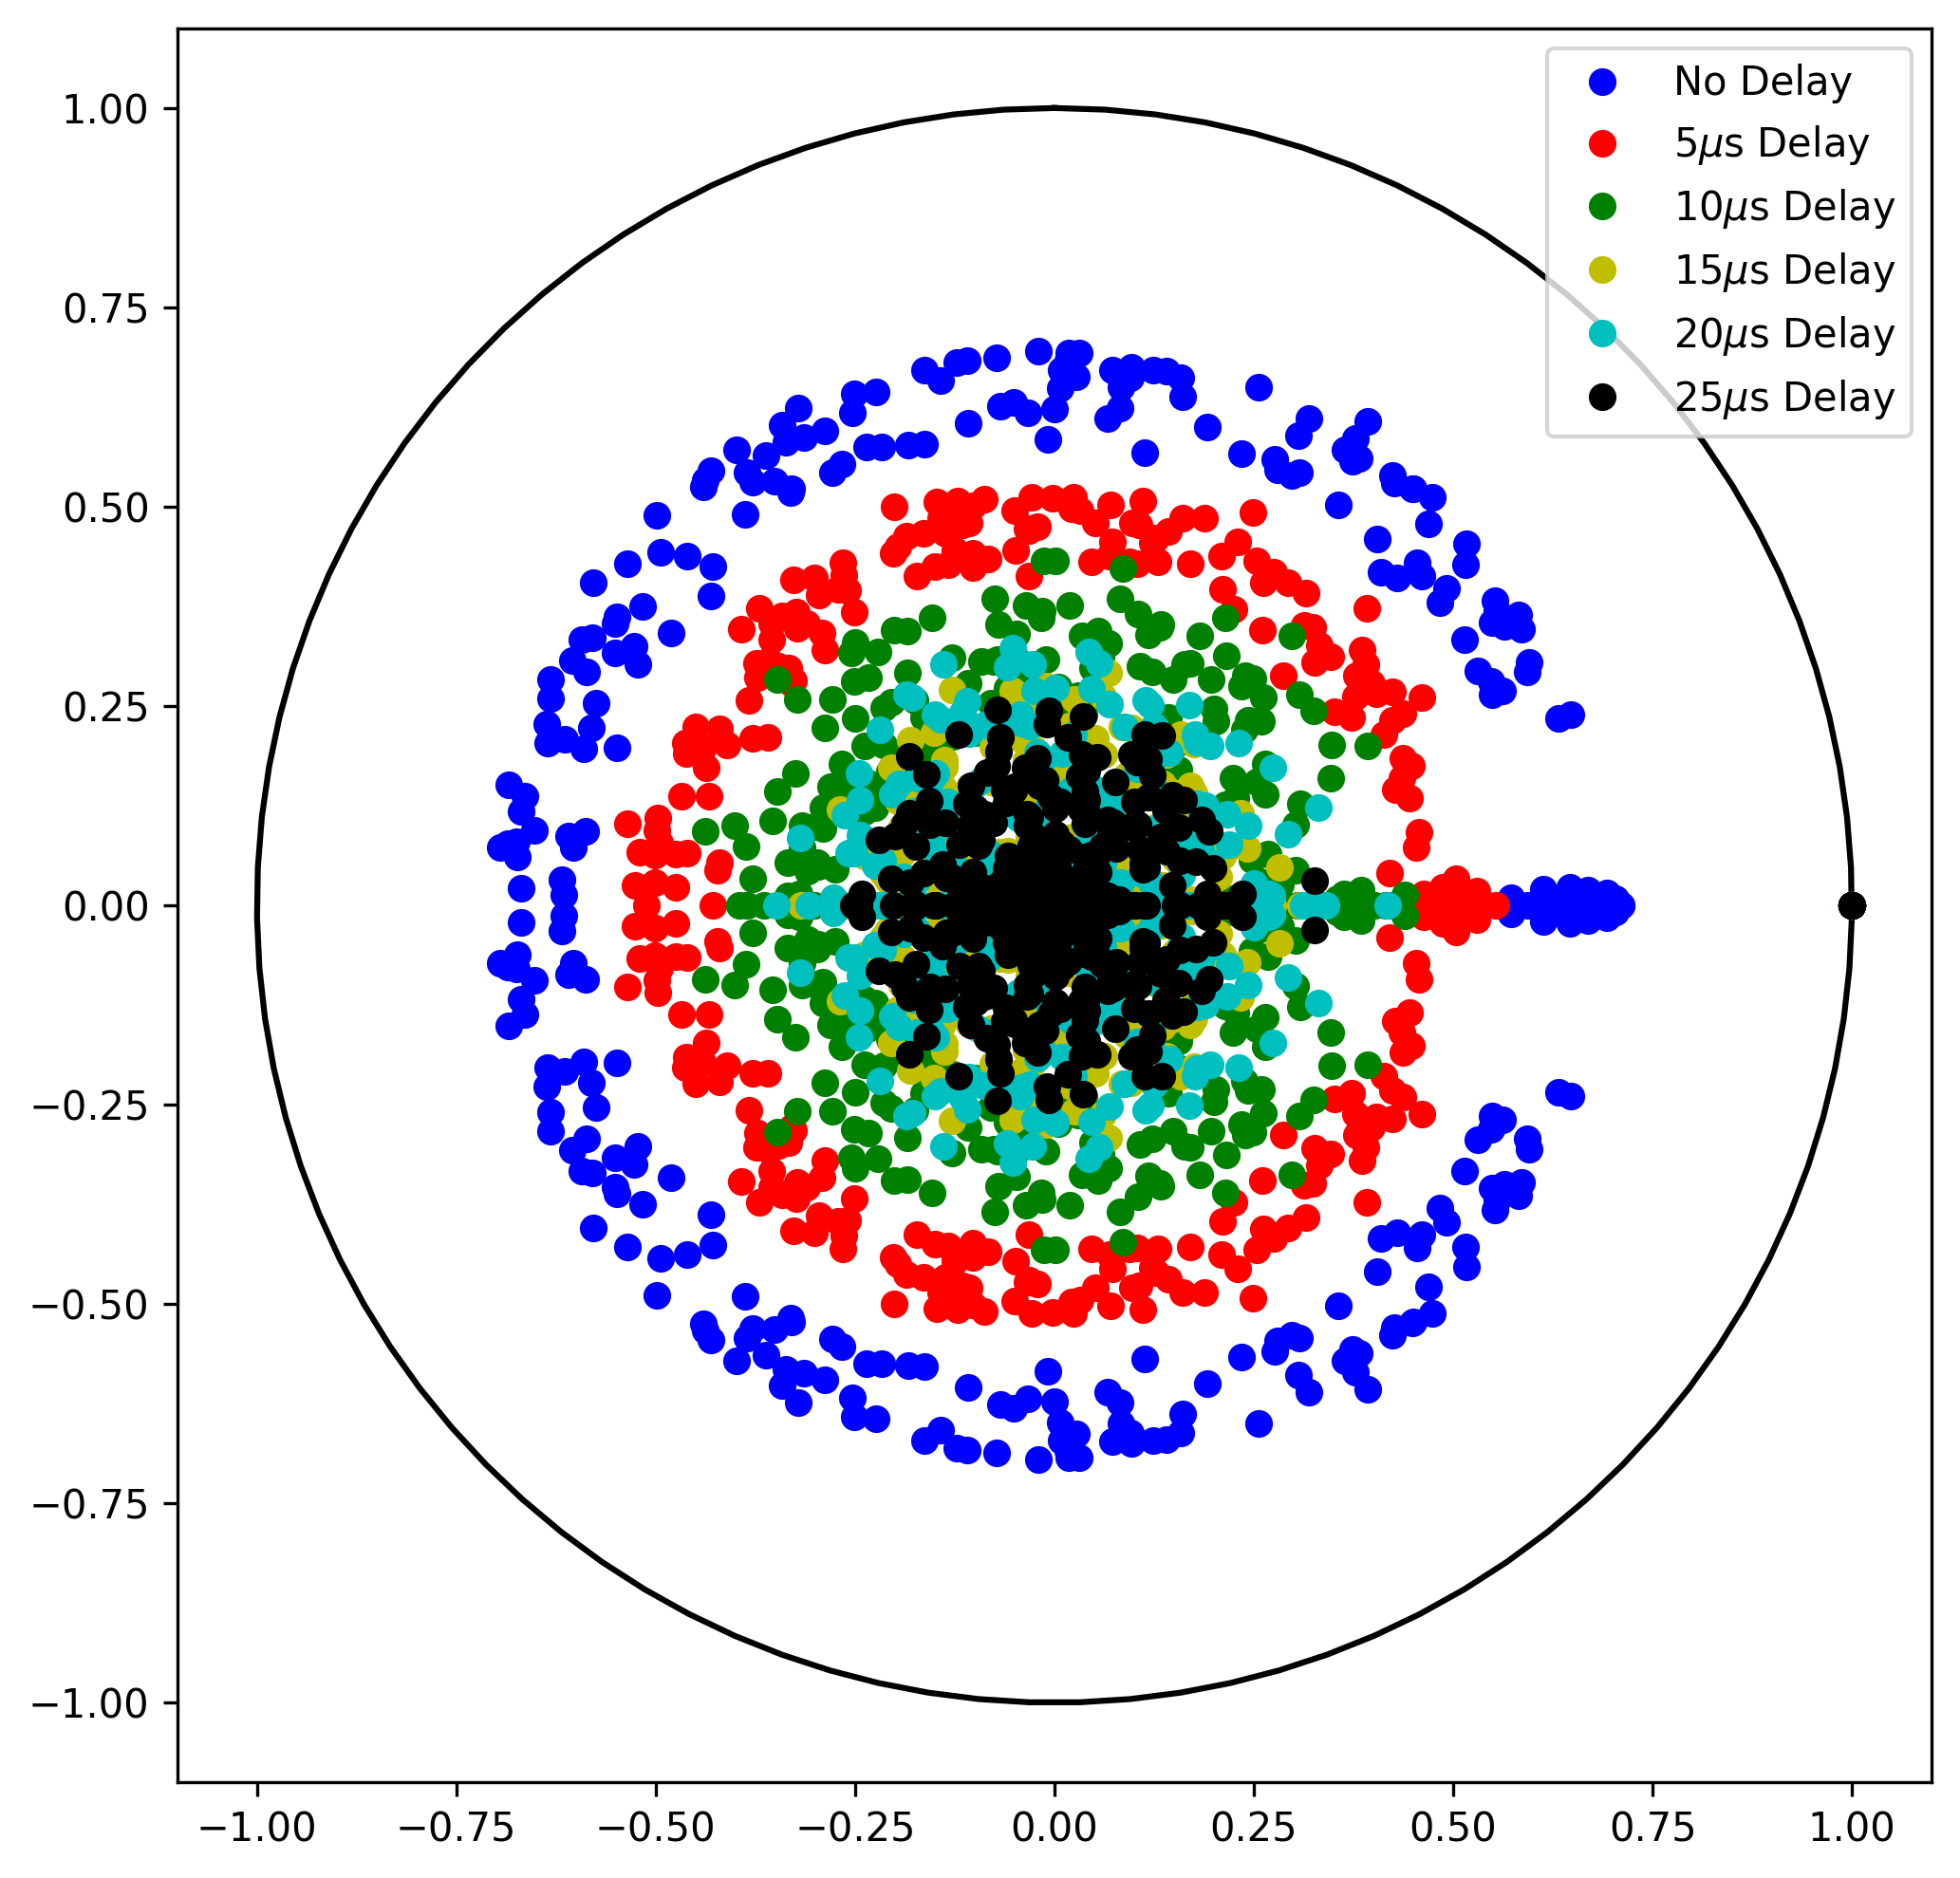

In [132]:
fig = plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)
plt.plot(*circle, "k")

spectrum6 = [np.concatenate([spectrum[:,0] for spectrum in spectrum6_list]), np.concatenate([spectrum[:,1] for spectrum in spectrum6_list])]

#for spectrum in spectrum1_list:
#    plt.plot(spectrum[:,0], spectrum[:,1], "bo")
plt.plot(*spectrum1, "bo")
plt.plot(*spectrum2, "ro")
plt.plot(*spectrum3, "go")
plt.plot(*spectrum4, "yo")
plt.plot(*spectrum5, "co")
plt.plot(*spectrum6, "ko")
    
plt.legend(["_","No Delay","5$\mu$s Delay","10$\mu$s Delay", "15$\mu$s Delay","20$\mu$s Delay", "25$\mu$s Delay"], loc = "upper right")

plt.show()

## Three Qubits, Ring Radii

In [133]:
R_p1, R_m1, R_pStd1, R_mStd1 = find_outer_inner_R([spectrum1_list[i][:-1] for i in range(5)])
R_p2, R_m2, R_pStd2, R_mStd2 = find_outer_inner_R([spectrum2_list[i][:-1] for i in range(5)])
R_p3, R_m3, R_pStd3, R_mStd3 = find_outer_inner_R([spectrum3_list[i][:-1] for i in range(5)])
R_p4, R_m4, R_pStd4, R_mStd4 = find_outer_inner_R([spectrum4_list[i][:-1] for i in range(5)])
R_p5, R_m5, R_pStd5, R_mStd5 = find_outer_inner_R([spectrum5_list[i][:-1] for i in range(5)])
R_p6, R_m6, R_pStd6, R_mStd6 = find_outer_inner_R([spectrum6_list[i][:-1] for i in range(5)])

In [134]:
x = [0, 5, 10, 15, 20, 25]
R_plus = [R_p1, R_p2, R_p3, R_p4, R_p5, R_p6]
R_minus = [R_m1, R_m2, R_m3, R_m4, R_m5, R_m6]
R_plus_std = [R_pStd1, R_pStd2, R_pStd3, R_pStd4, R_pStd5, R_pStd6]
R_minus_std = [R_mStd1, R_mStd2, R_mStd3, R_mStd4, R_mStd5, R_mStd6]

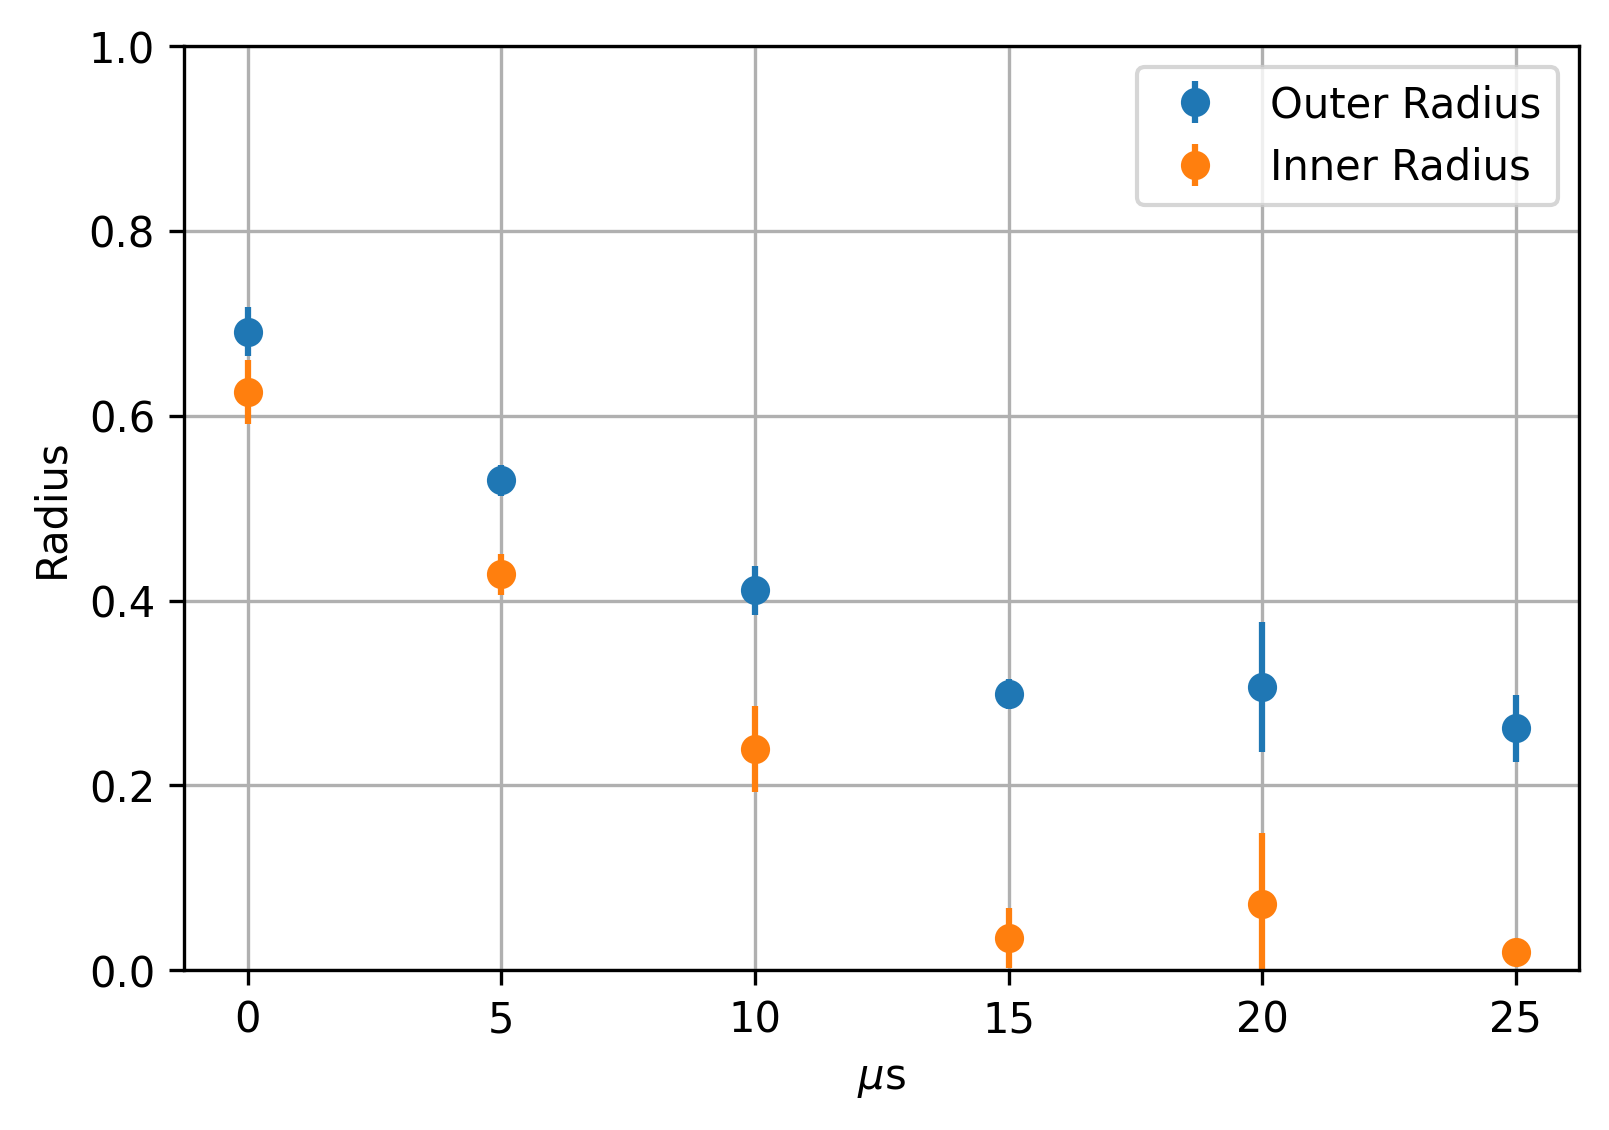

In [135]:
fig = plt.figure(figsize=(6,4), dpi = 300, facecolor='w', edgecolor='k')

plt.errorbar(x, R_plus, yerr=R_plus_std, fmt="o")
plt.errorbar(x, R_minus, yerr=R_minus_std, fmt="o")
plt.ylim([0,1])
plt.grid()
plt.xlabel("$\mu$s")
plt.ylabel("Radius")
plt.legend(["Outer Radius", "Inner Radius"])
plt.show()

## Three Qubits, Angular Distibution

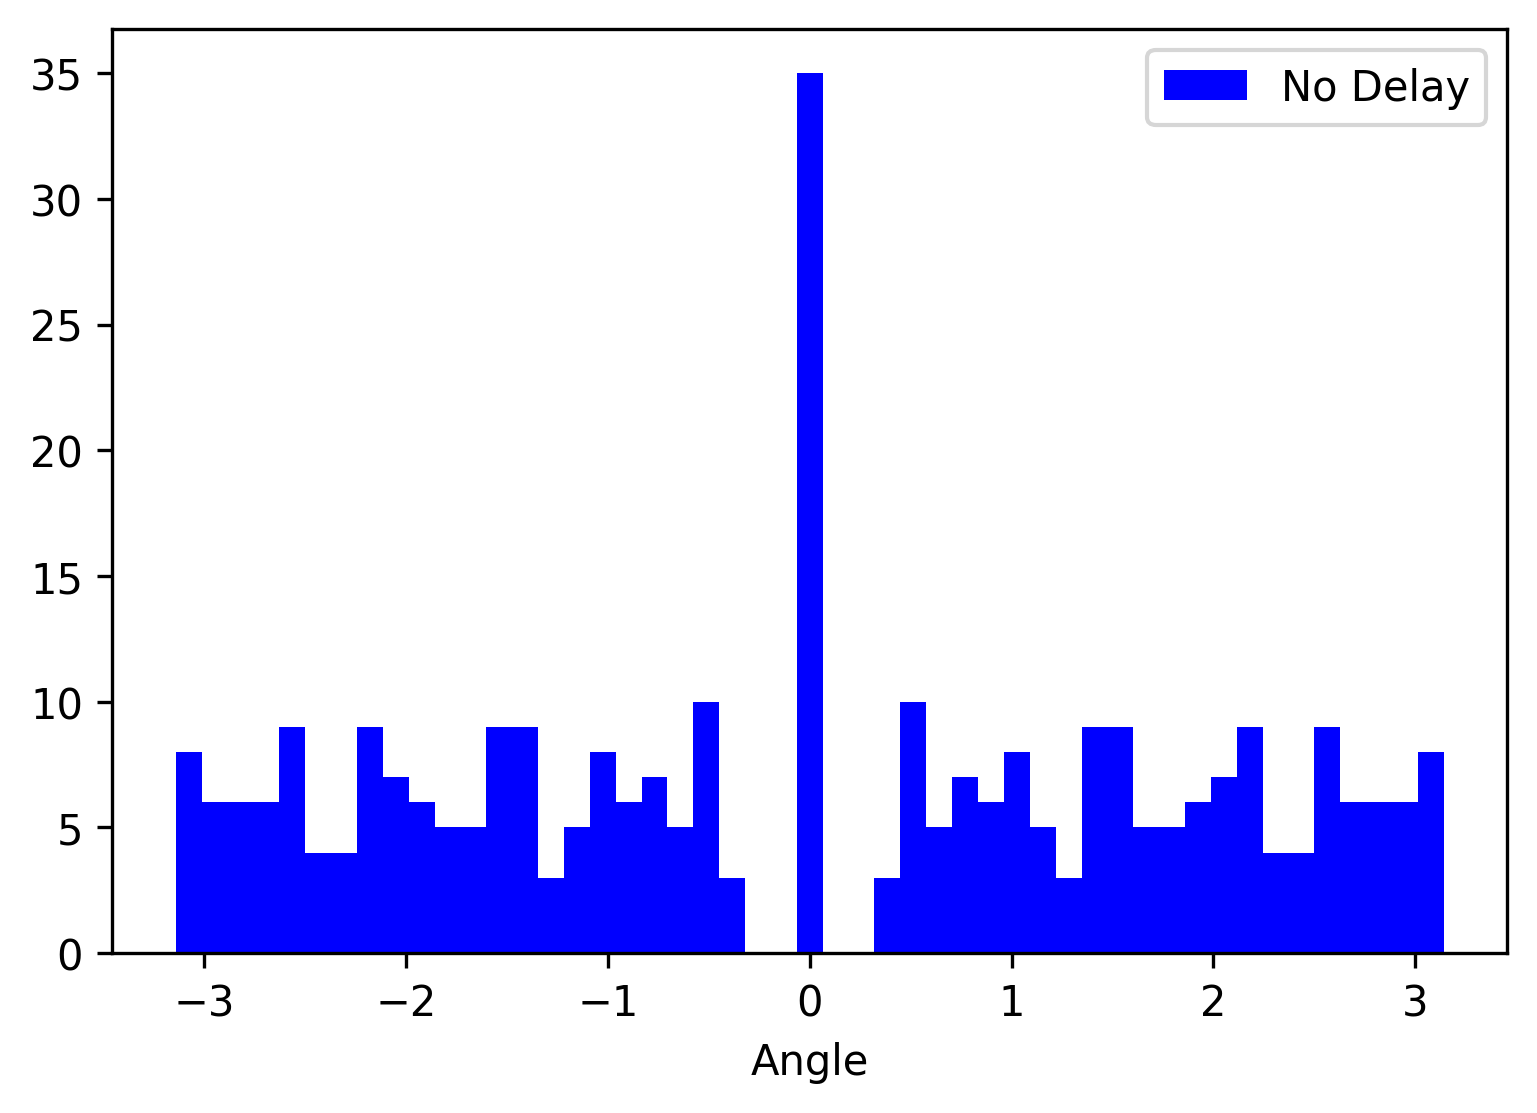

In [123]:
fig = plt.figure(figsize=(6,4), dpi = 300, facecolor='w', edgecolor='k')

angular_histogram(spectrum1_list, bins=np.linspace(-np.pi, np.pi, 50))
plt.xlabel("Angle")
plt.legend(["No Delay","5$\mu$s Delay","10$\mu$s Delay", "15$\mu$s Delay","20$\mu$s Delay", "25$\mu$s Delay"], loc = "upper right")
plt.show()

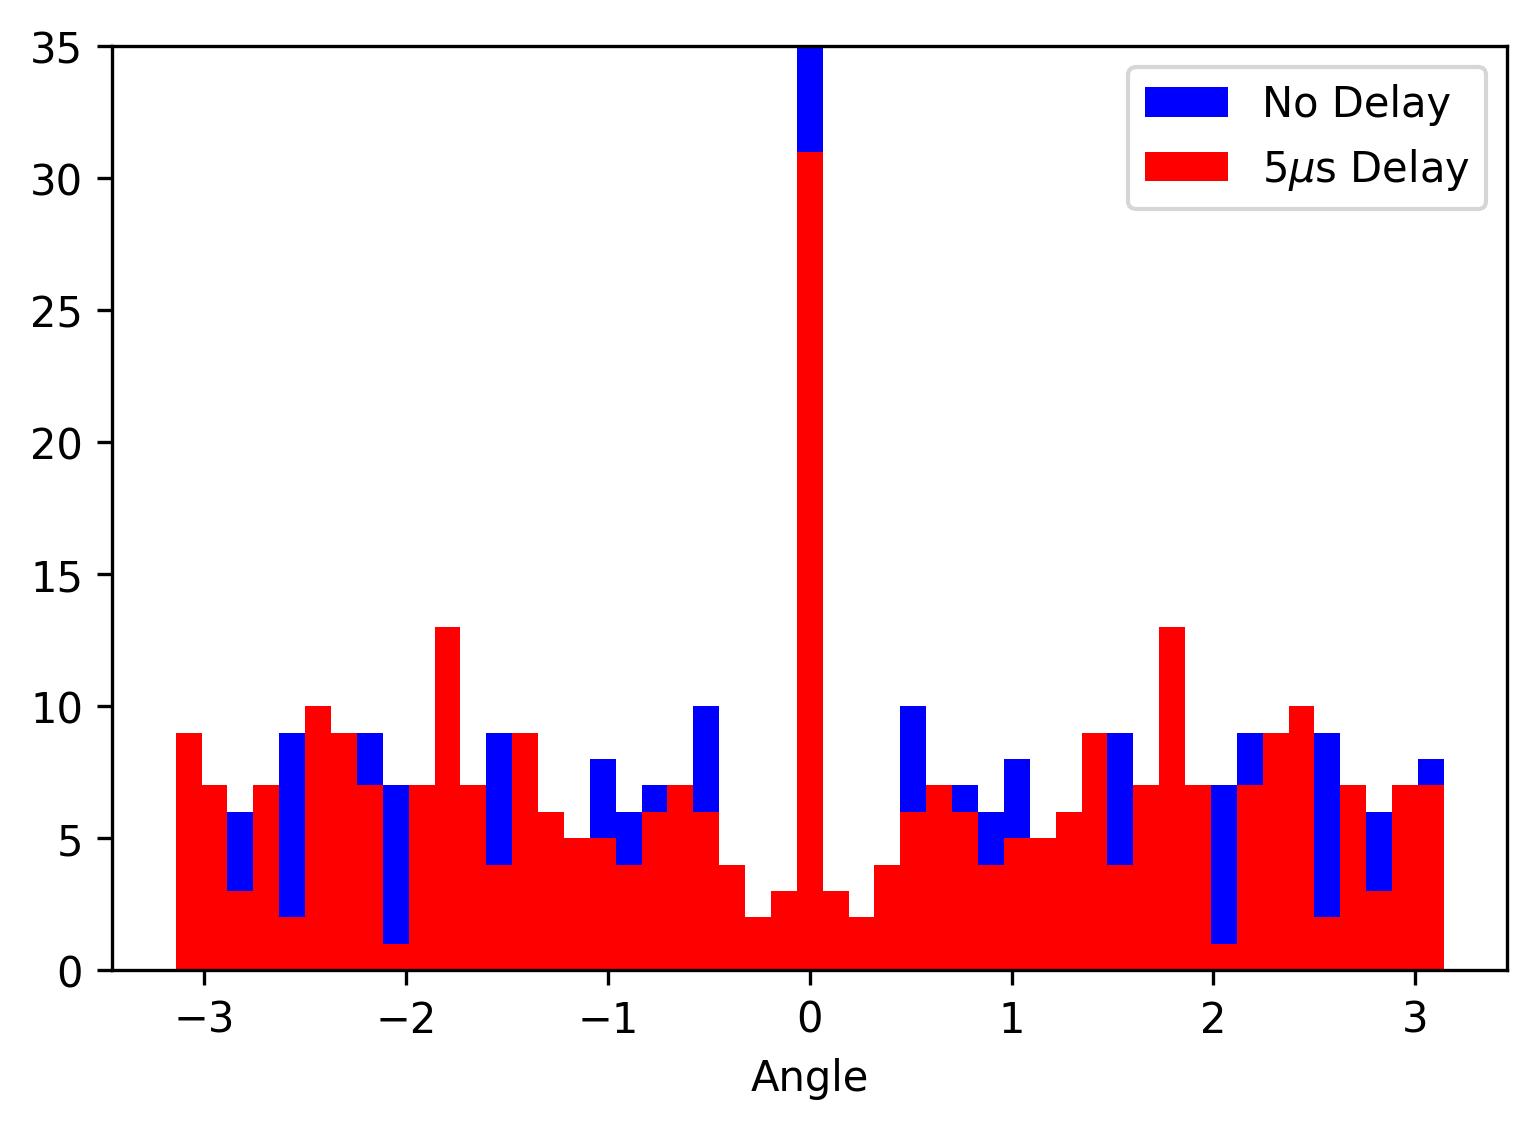

In [125]:
fig = plt.figure(figsize=(6,4), dpi = 300, facecolor='w', edgecolor='k')

angular_histogram(spectrum1_list, bins=np.linspace(-np.pi, np.pi, 50))
angular_histogram(spectrum2_list, bins=np.linspace(-np.pi, np.pi, 50), color="r")
plt.legend(["No Delay","5$\mu$s Delay","10$\mu$s Delay", "15$\mu$s Delay","20$\mu$s Delay", "25$\mu$s Delay"], loc = "upper right")

plt.ylim([0,35])
plt.xlabel("Angle")
plt.show()

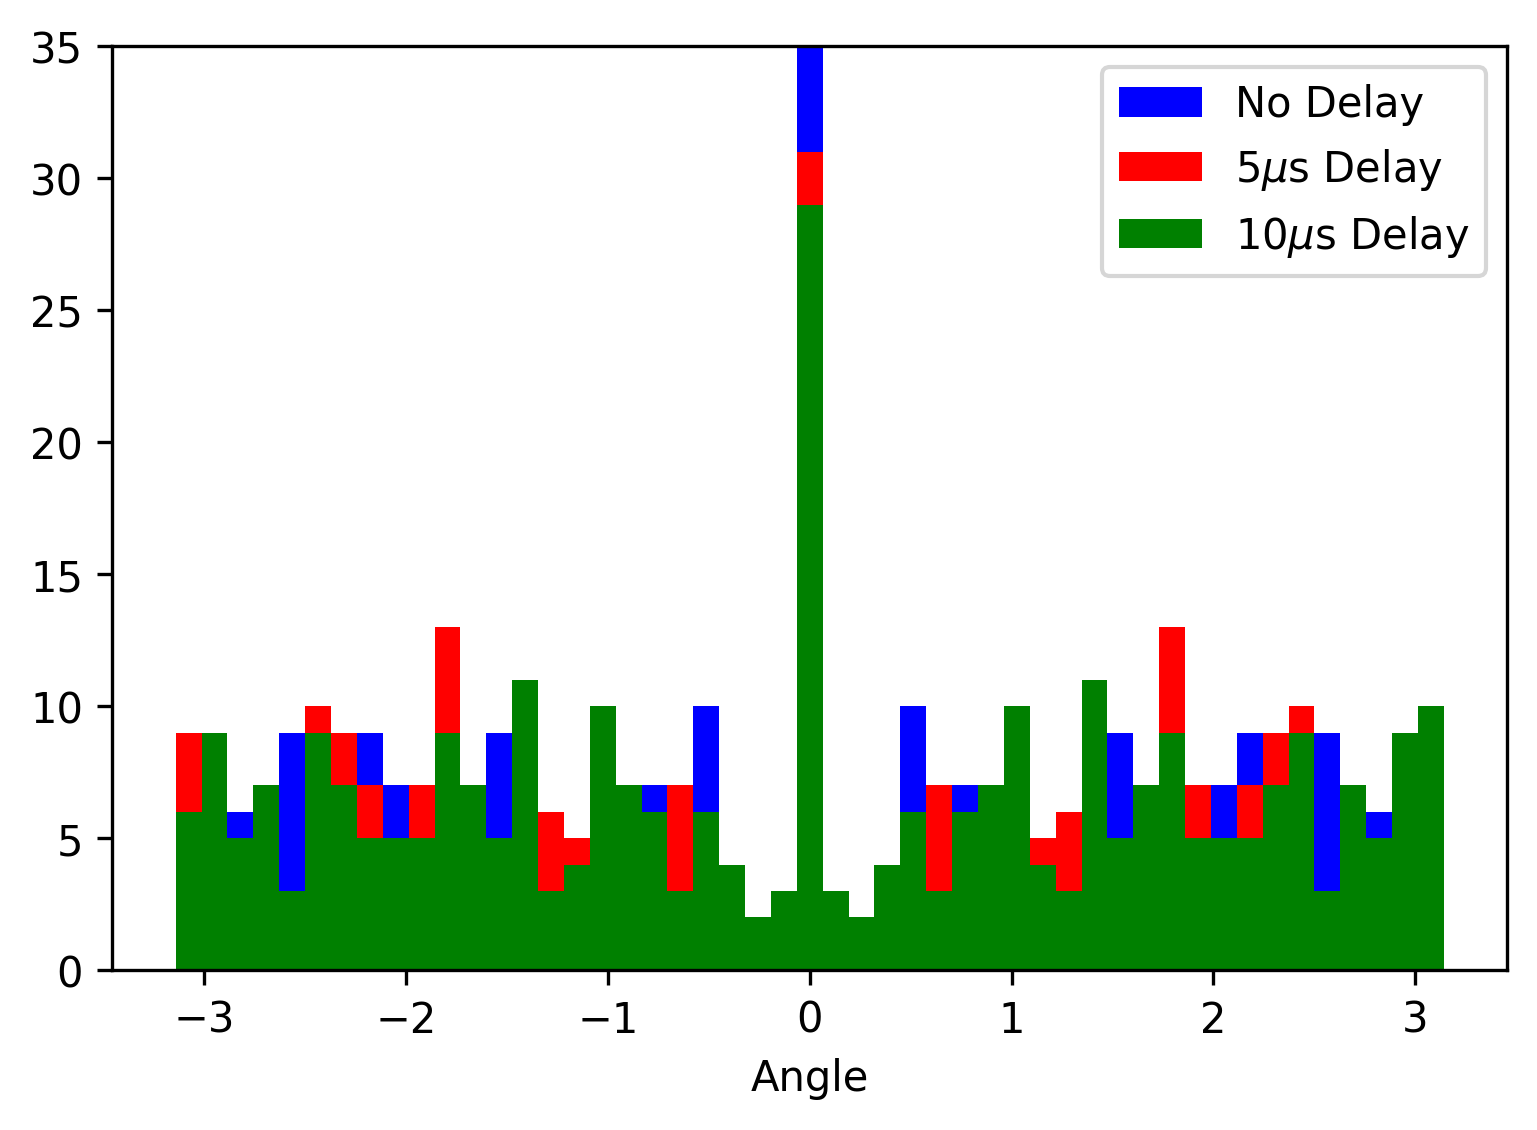

In [126]:
fig = plt.figure(figsize=(6,4), dpi = 300, facecolor='w', edgecolor='k')

angular_histogram(spectrum1_list, bins=np.linspace(-np.pi, np.pi, 50))
angular_histogram(spectrum2_list, bins=np.linspace(-np.pi, np.pi, 50), color="r")
angular_histogram(spectrum3_list, bins=np.linspace(-np.pi, np.pi, 50), color="g")
plt.legend(["No Delay","5$\mu$s Delay","10$\mu$s Delay", "15$\mu$s Delay","20$\mu$s Delay", "25$\mu$s Delay"], loc = "upper right")

plt.ylim([0,35])
plt.xlabel("Angle")
plt.show()

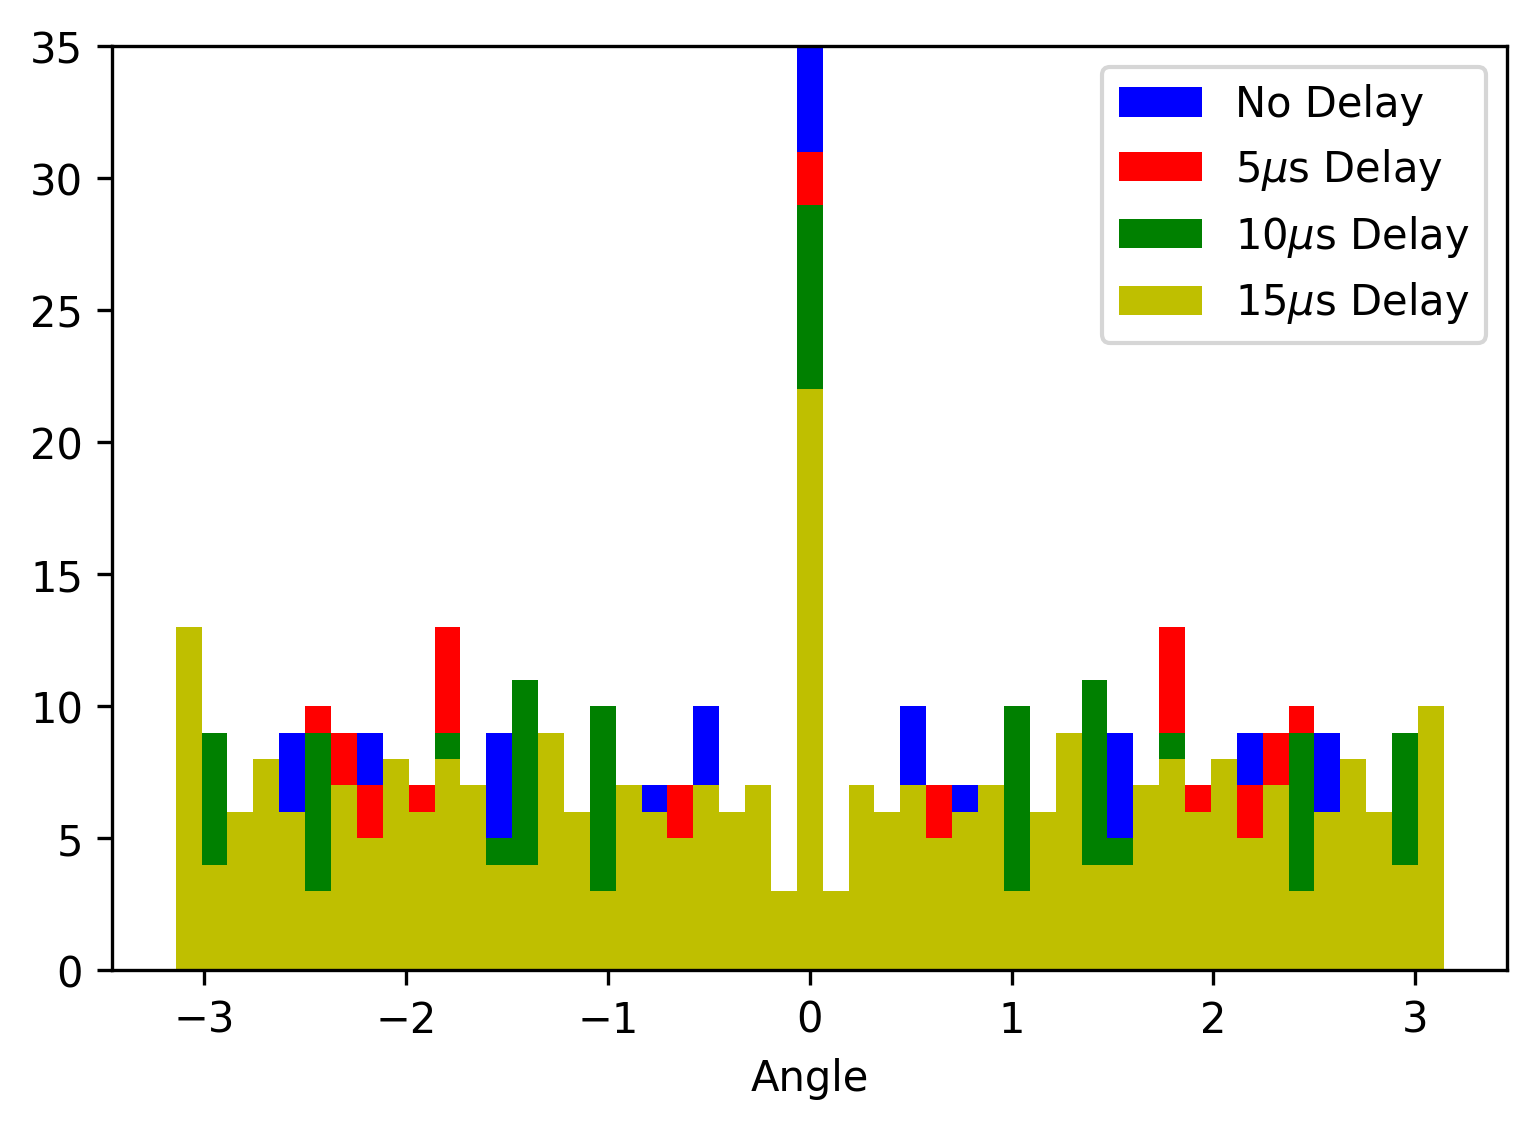

In [136]:
fig = plt.figure(figsize=(6,4), dpi = 300, facecolor='w', edgecolor='k')

angular_histogram(spectrum1_list, bins=np.linspace(-np.pi, np.pi, 50))
angular_histogram(spectrum2_list, bins=np.linspace(-np.pi, np.pi, 50), color="r")
angular_histogram(spectrum3_list, bins=np.linspace(-np.pi, np.pi, 50), color="g")
angular_histogram(spectrum4_list, bins=np.linspace(-np.pi, np.pi, 50), color="y")
plt.legend(["No Delay","5$\mu$s Delay","10$\mu$s Delay", "15$\mu$s Delay","20$\mu$s Delay", "25$\mu$s Delay"], loc = "upper right")

plt.ylim([0,35])
plt.xlabel("Angle")
plt.show()

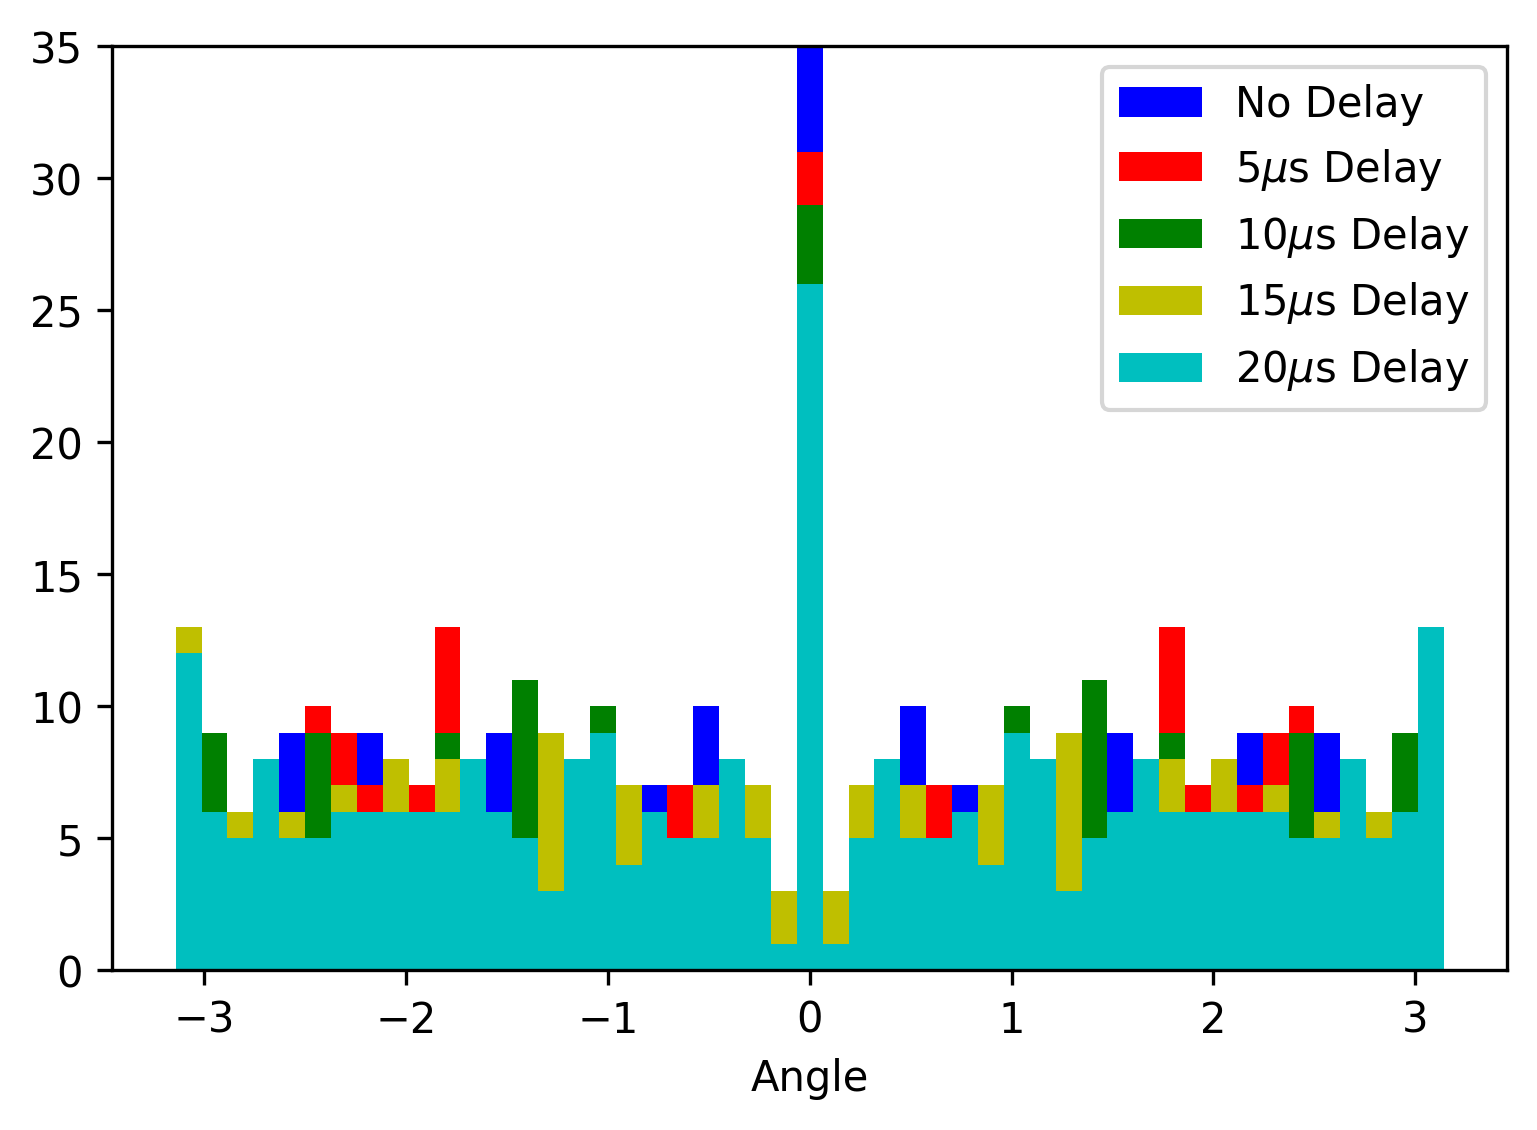

In [137]:
fig = plt.figure(figsize=(6,4), dpi = 300, facecolor='w', edgecolor='k')

angular_histogram(spectrum1_list, bins=np.linspace(-np.pi, np.pi, 50))
angular_histogram(spectrum2_list, bins=np.linspace(-np.pi, np.pi, 50), color="r")
angular_histogram(spectrum3_list, bins=np.linspace(-np.pi, np.pi, 50), color="g")
angular_histogram(spectrum4_list, bins=np.linspace(-np.pi, np.pi, 50), color="y")
angular_histogram(spectrum5_list, bins=np.linspace(-np.pi, np.pi, 50), color="c")
plt.legend(["No Delay","5$\mu$s Delay","10$\mu$s Delay", "15$\mu$s Delay","20$\mu$s Delay", "25$\mu$s Delay"], loc = "upper right")

plt.ylim([0,35])
plt.xlabel("Angle")
plt.show()

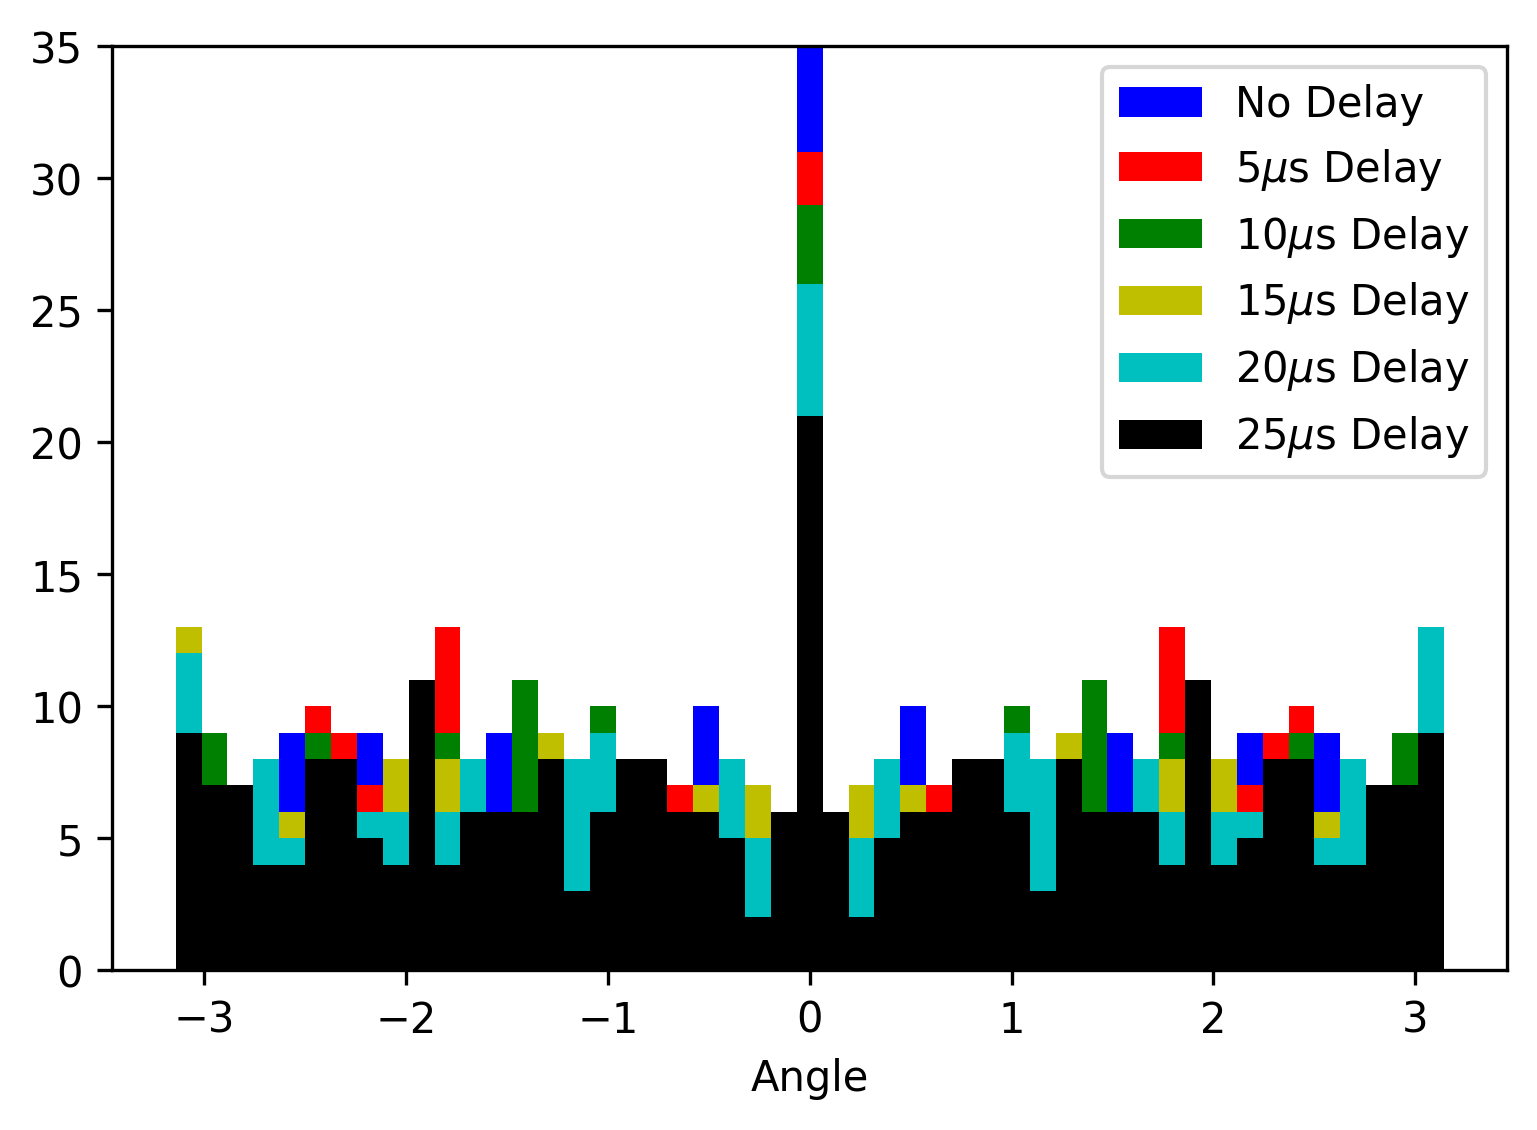

In [141]:
fig = plt.figure(figsize=(6,4), dpi = 300, facecolor='w', edgecolor='k')

angular_histogram(spectrum1_list, bins=np.linspace(-np.pi, np.pi, 50))
angular_histogram(spectrum2_list, bins=np.linspace(-np.pi, np.pi, 50), color="r")
angular_histogram(spectrum3_list, bins=np.linspace(-np.pi, np.pi, 50), color="g")
angular_histogram(spectrum4_list, bins=np.linspace(-np.pi, np.pi, 50), color="y")
angular_histogram(spectrum5_list, bins=np.linspace(-np.pi, np.pi, 50), color="c")
angular_histogram(spectrum6_list, bins=np.linspace(-np.pi, np.pi, 50), color="k")
plt.legend(["No Delay","5$\mu$s Delay","10$\mu$s Delay", "15$\mu$s Delay","20$\mu$s Delay", "25$\mu$s Delay"], loc = "upper right")

plt.ylim([0,35])
plt.xlabel("Angle")
plt.show()

## Entangling Dissipation

In [5]:
inputs_map, inputs_spam, counts_list =  pickle.load(open(f"../../data/threeQubits_decay_belem.p", "rb"))
n=3
d=2**n


targets_map = counts_to_probs(counts_list[:2000-6**n])
targets_spam = counts_to_probs(counts_list[2000-6**n:])

data = [inputs_spam, targets_spam, inputs_map, targets_map]

inputs_spam, targets_spam, inputs_map, targets_map = data
    
spam = SPAM(d=d, 
            use_corr_mat = True,
            optimizer = tf.optimizers.Adam(learning_rate=0.01),
            )

spam.pretrain(targets = [init_ideal(d), povm_ideal(d)],
              num_iter = 300,
              verbose = False,
              )

spam.train(inputs = inputs_spam,
           targets = targets_spam,
           num_iter = 1000,
           verbose = False,
          )

model = ModelQuantumMap(channel = KrausMap(d=d, 
                                               rank=16,
                                               spam = spam,
                                              ),
                           loss_function = ProbabilityMSE(),
                           optimizer = tf.optimizers.Adam(learning_rate=0.01),
                           logger = Logger(loss_function = ProbabilityMSE(), verbose=False),
                           )

model.train(inputs = inputs_map,
            targets = targets_map,
            num_iter = 2000,
            N = 500,
            )  

  0%|          | 0/300 [00:00<?, ?it/s]

9.059889806118323e-05


  0%|          | 0/1000 [00:00<?, ?it/s]

0.010216302971883121


  0%|          | 0/2000 [00:00<?, ?it/s]

0.009233132282428988 None


In [13]:
X, A, B = generate_ginibre(2, 2, trainable=True)
X, C, D = generate_ginibre(2, 2, trainable=True)
X, E, F = generate_ginibre(2, 2, trainable=True)

In [7]:
optimizer = tf.optimizers.Adam(learning_rate=0.01)

for i in range(2000):
    with tf.GradientTape(watch_accessed_variables=False) as tape:
        tape.watch([A,B,C,D,E,F])
        
        
        X1 = tf.cast(A, dtype=precision) + 1j*tf.cast(B, dtype=precision)
        XX1 = tf.matmul(X1, X1, adjoint_b=True)
        state1 = XX1/tf.linalg.trace(XX1)
        
        X2 = tf.cast(C, dtype=precision) + 1j*tf.cast(D, dtype=precision)
        XX2 = tf.matmul(X2, X2, adjoint_b=True)
        state2 = XX2/tf.linalg.trace(XX2)
        
        X3 = tf.cast(E, dtype=precision) + 1j*tf.cast(F, dtype=precision)
        XX3 = tf.matmul(X3, X3, adjoint_b=True)
        state3 = XX3/tf.linalg.trace(XX3)

        
        state = tf.expand_dims(kron(state1,state2,state3), axis=0)

        state = model.channel.apply_channel(state)
        state = partial_transpose(state, qubit=0)

        eig, _ = tf.linalg.eigh(state)
        eig = tf.math.real(eig)
        loss = tf.math.reduce_min(eig) + tf.math.reduce_sum(eig[eig<0]) - tf.math.reduce_min(eig[eig<0])
        grads = tape.gradient(loss, [A,B,C,D,E,F])
        optimizer.apply_gradients(zip(grads, [A,B,C,D,E,F]))
        print(loss.numpy())

-0.12289562705201908
-0.12642606375729662
-0.1298502295909535
-0.13316246612285354
-0.13636012748386533
-0.13944132572892115
-0.14240330494612405
-0.14524335085224582
-0.1479591747991709
-0.15054881812222357
-0.15301079973717957
-0.15534426732385362
-0.15754914410909276
-0.159626195829168
-0.1615770416915094
-0.1634040641934596
-0.1651101975337997
-0.16669870330246458
-0.16817297954743257
-0.1695365195345231
-0.17079303497545106
-0.17194663626624473
-0.17300199369641853
-0.17396437668271314
-0.17483954560902182
-0.17563358792819903
-0.1763527234756108
-0.1770031702200699
-0.1775910349812279
-0.1781222422412044
-0.17860248574931423
-0.17903720622650265
-0.1794315943979059
-0.17979059158692198
-0.18011889465735922
-0.18042095566664187
-0.18070096983215714
-0.1809628472174519
-0.18121017383893828
-0.181446173859854
-0.18167368100426073
-0.18189512986050152
-0.1821125717970449
-0.1823277086704913
-0.18254193500934504
-0.18275637865019134
-0.18297192863590983
-0.18318924836808193
-0.1834087

-0.1995287467423615
-0.1995288199413088
-0.19952889206337282
-0.19952896314209992
-0.1995290331852558
-0.1995291022036455
-0.19952917020644487
-0.19952923722661633
-0.19952930327201057
-0.19952936836281854
-0.1995294325142827
-0.19952949573402226
-0.19952955803916506
-0.19952961946290862
-0.19952967999808383
-0.19952973965723295
-0.1995297984583978
-0.1995298564130126
-0.1995299135508203
-0.19952996986506374
-0.19953002536563297
-0.19953008008720888
-0.1995301340214027
-0.19953018718464827
-0.19953023959514965
-0.19953029125874855
-0.19953034219469734
-0.1995303924079008
-0.19953044190876096
-0.19953049071659393
-0.19953053882403016
-0.19953058625225945
-0.19953063301818527
-0.19953067912891162
-0.19953072458487686
-0.1995307694027955
-0.19953081359858846
-0.199530857172986
-0.19953090013958596
-0.19953094250069855
-0.19953098427345167
-0.19953102545959706
-0.19953106606903484
-0.19953110610950178
-0.1995311455959297
-0.19953118453152568
-0.19953122292373882
-0.19953126077597635
-0.199

-0.19953399767336677
-0.19953399794209517
-0.19953399820646475
-0.19953399846710831
-0.19953399872396055
-0.19953399897717894
-0.1995339992262985
-0.19953399947170192
-0.19953399971370409
-0.19953399995173288
-0.1995340001866644
-0.19953400041775887
-0.19953400064540755
-0.1995340008693403
-0.1995340010900127
-0.19953400130759227
-0.19953400152159068
-0.19953400173290406
-0.19953400194076318
-0.19953400214548672
-0.19953400234715518
-0.19953400254537956
-0.1995340027411377
-0.19953400293339896
-0.19953400312292233
-0.1995340033094968
-0.199534003493522
-0.19953400367434723
-0.19953400385274447
-0.19953400402813123
-0.19953400420125403
-0.19953400437138052
-0.1995340045392835
-0.19953400470429433
-0.19953400486694428
-0.19953400502702245
-0.19953400518465944
-0.1995340053398545
-0.19953400549282496
-0.19953400564307103
-0.19953400579133077
-0.19953400593704024
-0.19953400608072386
-0.19953400622189885
-0.19953400636115695
-0.1995340064984776
-0.1995340066335382
-0.19953400676658833
-0.1

-0.19953401479056404
-0.19953401479075733
-0.19953401479094715
-0.1995340147911344
-0.19953401479131477
-0.19953401479149188
-0.19953401479166674
-0.19953401479183894
-0.19953401479200747
-0.19953401479217692
-0.19953401479233432
-0.19953401479248803
-0.19953401479263902
-0.1995340147927879
-0.19953401479293306
-0.19953401479307545
-0.19953401479321625
-0.19953401479335467
-0.19953401479349078
-0.19953401479362315
-0.1995340147937534
-0.19953401479388252
-0.19953401479401023
-0.19953401479413355
-0.1995340147942544
-0.199534014794374
-0.19953401479448943
-0.1995340147946034
-0.1995340147947152
-0.19953401479481384
-0.19953401479490981
-0.19953401479500726
-0.19953401479510657
-0.199534014795203
-0.19953401479529753
-0.19953401479538596
-0.199534014795479
-0.19953401479556615
-0.19953401479565203
-0.19953401479573635
-0.19953401479581911
-0.19953401479590116
-0.19953401479598257
-0.19953401479606359
-0.19953401479614102
-0.19953401479621868
-0.19953401479629662
-0.19953401479637323
-0.1

-0.19953401479957913
-0.19953401479957894
-0.19953401479957902
-0.1995340147995793
-0.19953401479957902
-0.19953401479957936
-0.1995340147995793
-0.19953401479957902
-0.19953401479957963
-0.1995340147995804
-0.1995340147995806
-0.19953401479958036
-0.19953401479958097
-0.1995340147995807
-0.19953401479958063
-0.19953401479958097
-0.19953401479958094
-0.19953401479958072
-0.19953401479958066
-0.19953401479958083
-0.19953401479958052
-0.199534014799581
-0.199534014799581
-0.19953401479958074
-0.1995340147995807
-0.19953401479958052
-0.199534014799581
-0.19953401479958063
-0.1995340147995806
-0.1995340147995808
-0.1995340147995809
-0.1995340147995806
-0.19953401479958044
-0.19953401479958097
-0.19953401479958108
-0.1995340147995806
-0.19953401479958074
-0.1995340147995808
-0.1995340147995804
-0.19953401479958083
-0.1995340147995809
-0.199534014799581
-0.19953401479958077
-0.1995340147995807
-0.1995340147995806
-0.19953401479958205
-0.19953401479958238
-0.199534014799582
-0.199534014799581

In [8]:
state = kron(state1,state2,state3)

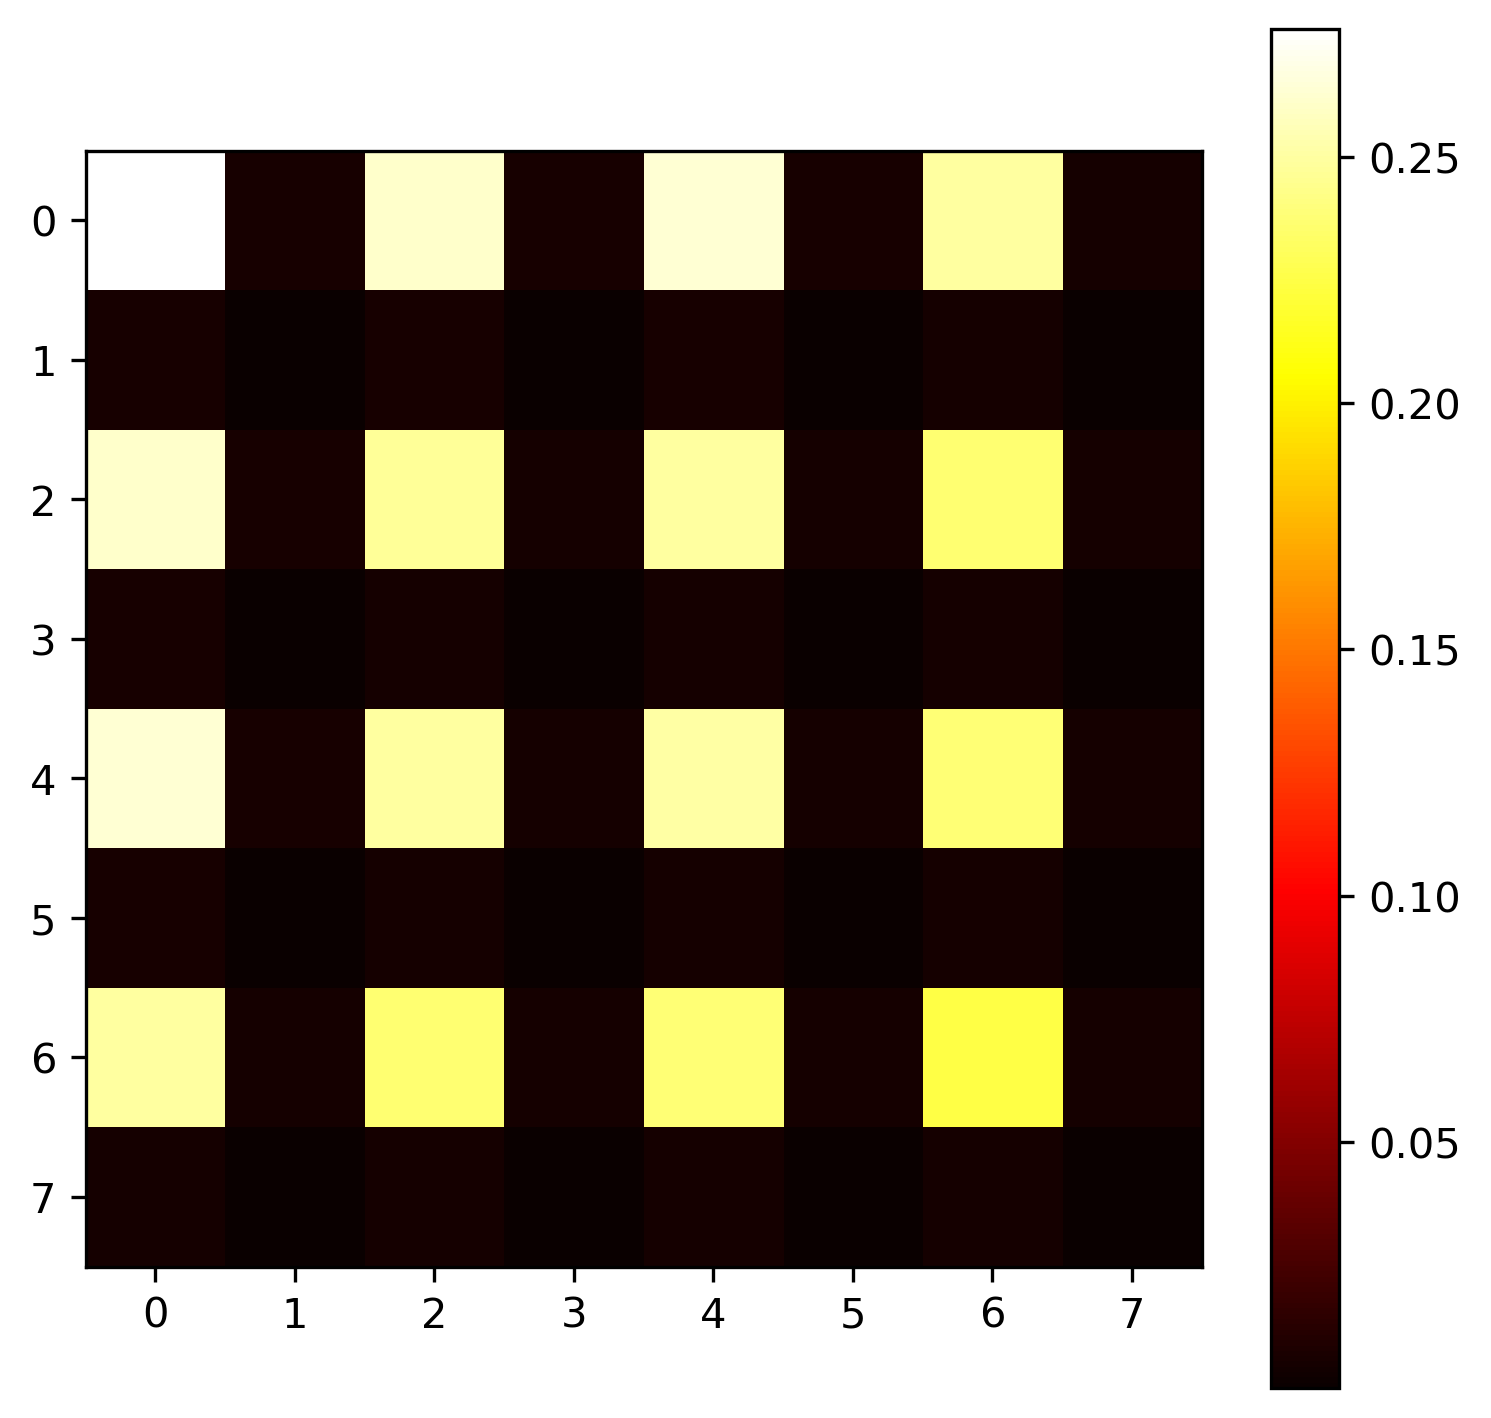

In [9]:
fig = plt.figure(figsize=(6,6), dpi = 300, facecolor='w', edgecolor='k')
plt.imshow(np.abs(state), cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

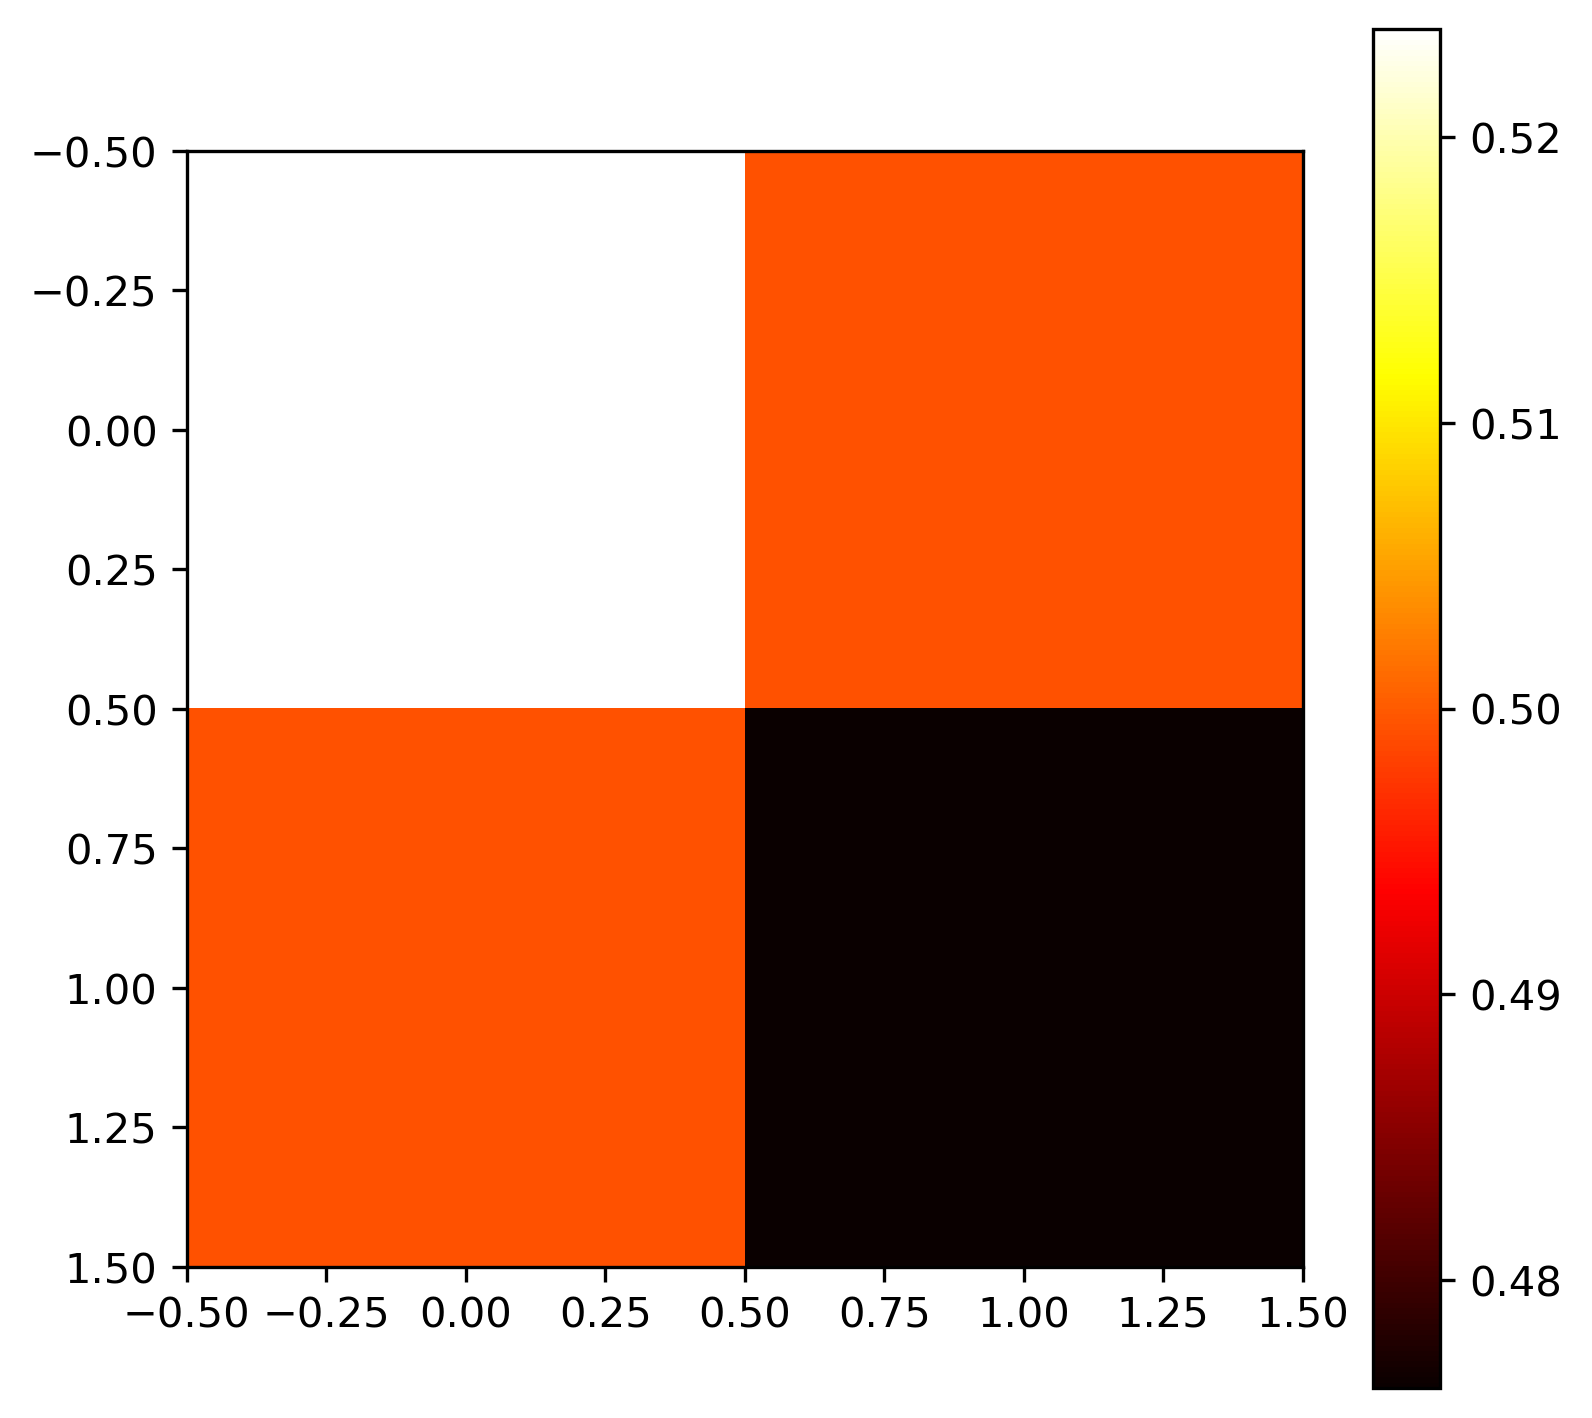

In [10]:
fig = plt.figure(figsize=(6,6), dpi = 300, facecolor='w', edgecolor='k')
plt.imshow(np.abs(state1), cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

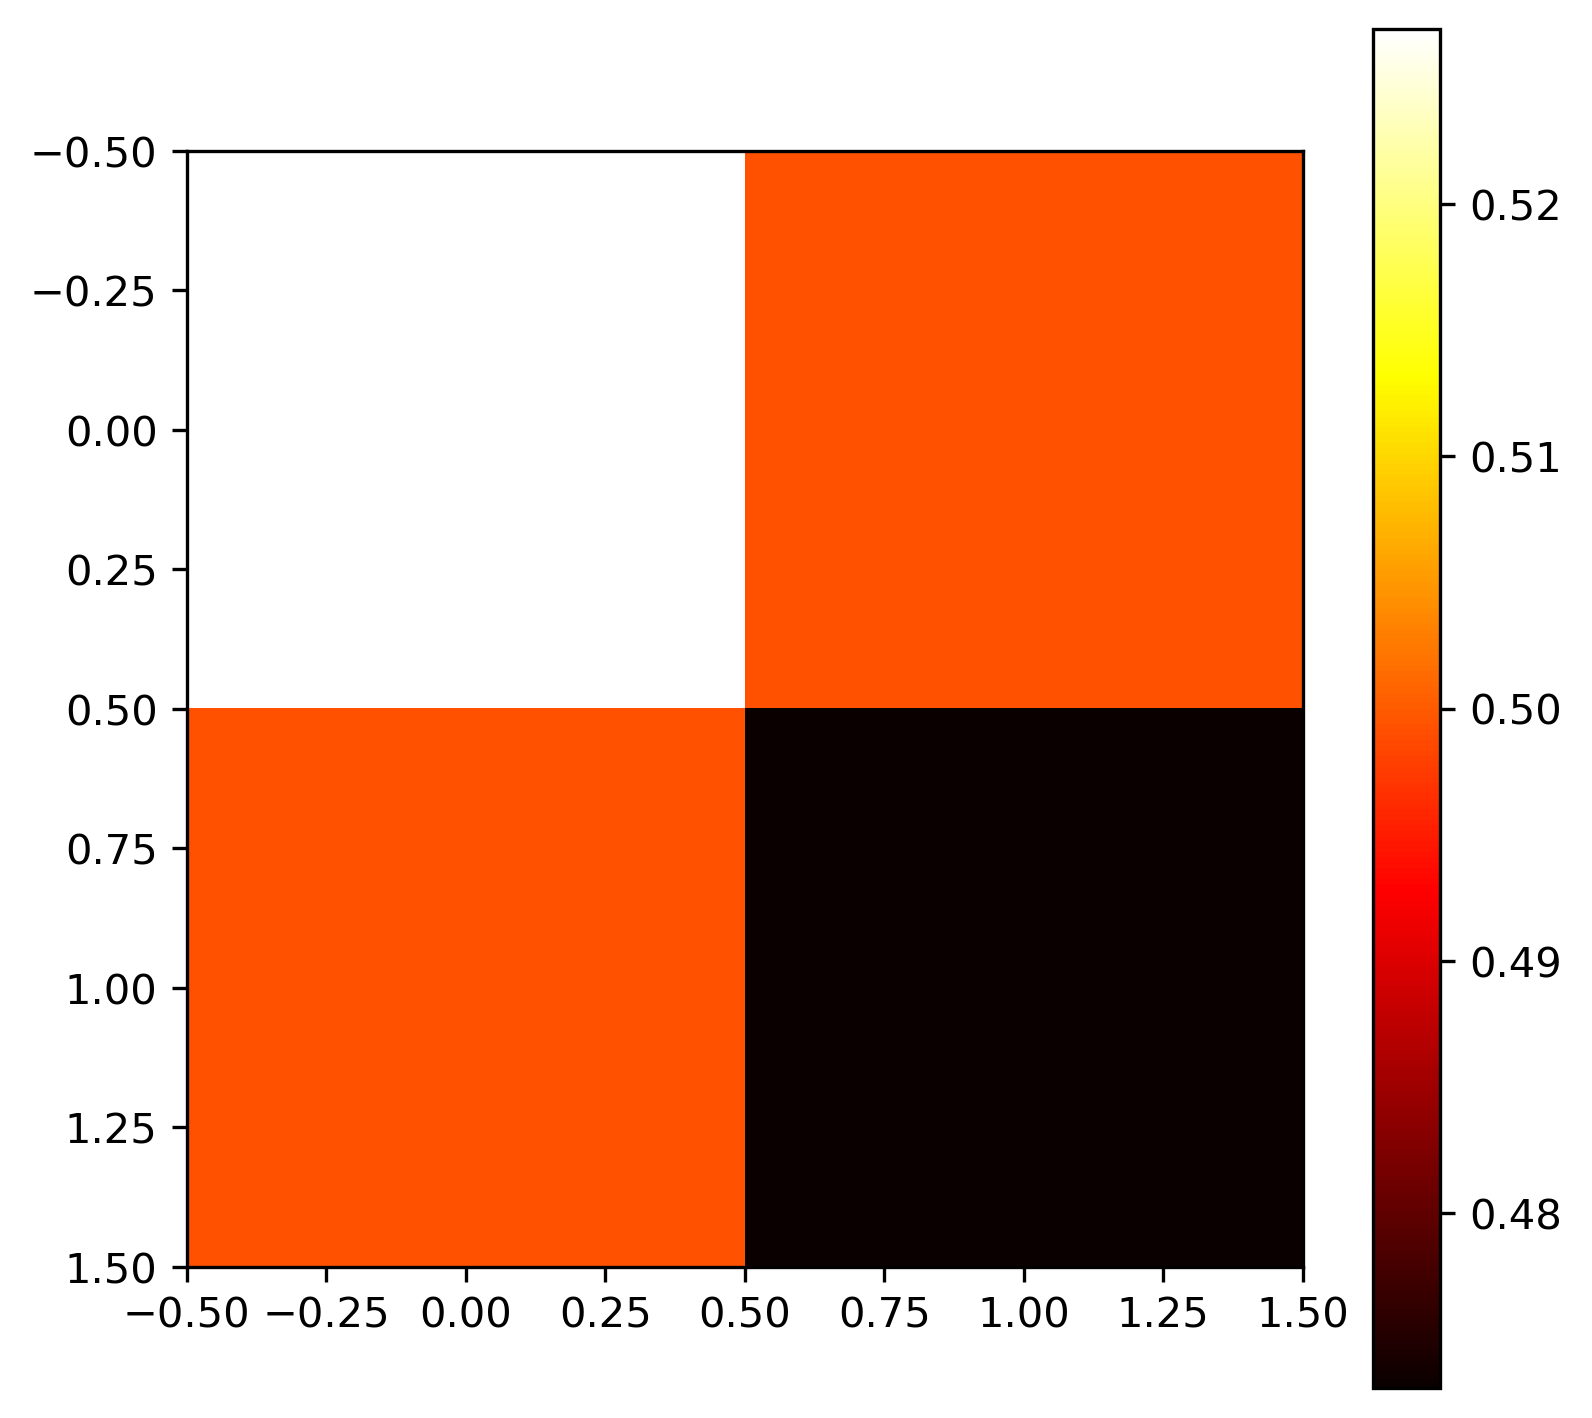

In [11]:
fig = plt.figure(figsize=(6,6), dpi = 300, facecolor='w', edgecolor='k')
plt.imshow(np.abs(state2), cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

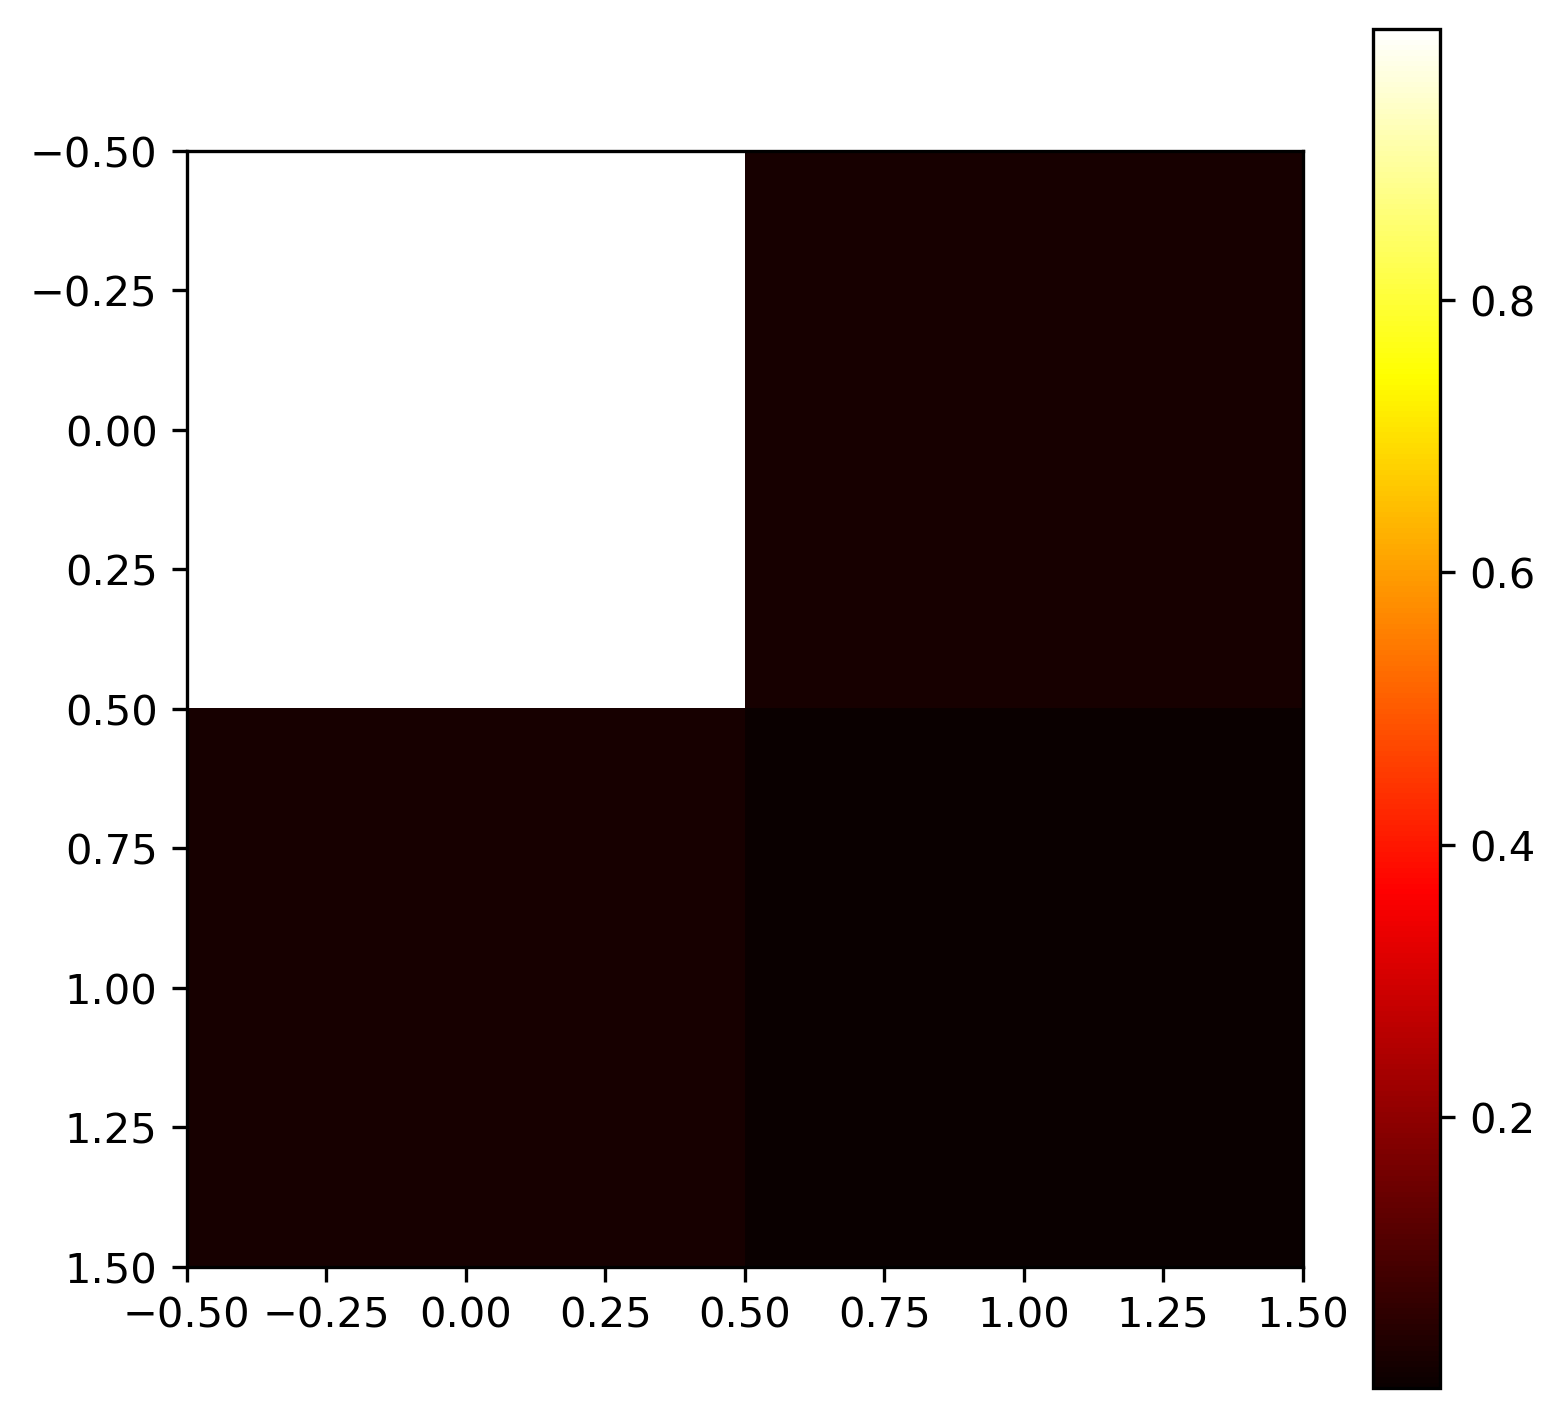

In [12]:
fig = plt.figure(figsize=(6,6), dpi = 300, facecolor='w', edgecolor='k')
plt.imshow(np.abs(state3), cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

In [18]:
N = targets_map.shape[0]
d = model.channel.spam.init.shape[0]
U_prep, U_basis = inputs_map

state = tf.repeat(tf.expand_dims(model.channel.spam.init, axis=0), N, axis=0)
state = apply_unitary(state, U_prep)
state = model.channel.apply_channel(state)
output = measurement(state, U_basis, model.channel.spam.povm)

In [21]:
print(output[1], targets_map[1])

tf.Tensor(
[0.1987+8.6249e-19j 0.1471-1.7798e-18j 0.1063+1.6813e-18j
 0.0768-2.7883e-19j 0.1931+9.6475e-18j 0.1217-1.0601e-18j
 0.083 +1.9314e-18j 0.0761+1.4505e-18j], shape=(8,), dtype=complex128) tf.Tensor(
[0.215+0.j 0.145+0.j 0.107+0.j 0.078+0.j 0.166+0.j 0.129+0.j 0.07 +0.j
 0.09 +0.j], shape=(8,), dtype=complex128)


In [143]:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

map_stability1 = []

for i in tqdm(range(5)):
    model = fit_model(f"threeQubits_PQC_5usDelay_belem_{i}", ratio=0.5, rank=16)
    map_stability1.append(model)

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

0.0090221323813562


  0%|          | 0/2000 [00:00<?, ?it/s]

0.00600287005556968 None


  0%|          | 0/2000 [00:00<?, ?it/s]

0.008918165075153051


  0%|          | 0/2000 [00:00<?, ?it/s]

0.007513710624506129 None


  0%|          | 0/2000 [00:00<?, ?it/s]

0.008952104705195741


  0%|          | 0/2000 [00:00<?, ?it/s]

0.006455759819969178 None


  0%|          | 0/2000 [00:00<?, ?it/s]

0.008713885043136214


  0%|          | 0/2000 [00:00<?, ?it/s]

0.005683570207258908 None


  0%|          | 0/2000 [00:00<?, ?it/s]

0.010258367333808664


  0%|          | 0/2000 [00:00<?, ?it/s]

0.006173709838921238 None


In [144]:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

map_stability2 = []

for i in tqdm(range(5)):
    model = fit_model(f"threeQubits_PQC_5usDelay_belem_{i}", ratio=0.25, rank=16)
    map_stability2.append(model)

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

0.0090221323813562


  0%|          | 0/2000 [00:00<?, ?it/s]

0.0035734612823193576 None


  0%|          | 0/2000 [00:00<?, ?it/s]

0.008918165075153051


  0%|          | 0/2000 [00:00<?, ?it/s]

0.003737395288070825 None


  0%|          | 0/2000 [00:00<?, ?it/s]

0.008952104705195741


  0%|          | 0/2000 [00:00<?, ?it/s]

0.003981688979907088 None


  0%|          | 0/2000 [00:00<?, ?it/s]

0.008713885043136214


  0%|          | 0/2000 [00:00<?, ?it/s]

0.003644948354145094 None


  0%|          | 0/2000 [00:00<?, ?it/s]

0.010258367333808664


  0%|          | 0/2000 [00:00<?, ?it/s]

0.003363585000653142 None


In [149]:
data_stab1 = [model.channel for model in model_threeQubits_list2]
data_stab2 = [model.channel for model in map_stability1]
data_stab3 = [model.channel for model in map_stability2]


spectrum_stab1_list = [channel_spectrum(channel) for channel in data_stab1]
spectrum_stab2_list = [channel_spectrum(channel) for channel in data_stab2]
spectrum_stab3_list = [channel_spectrum(channel) for channel in data_stab3]

saver(spectrum_stab1_list, "spectrum_stab1_list.p")
saver(spectrum_stab2_list, "spectrum_stab2_list.p")
saver(spectrum_stab3_list, "spectrum_stab3_list.p")

In [150]:
spectrum_stab1 = [np.concatenate([spectrum[:,0] for spectrum in spectrum_stab1_list]), np.concatenate([spectrum[:,1] for spectrum in spectrum_stab1_list])]
spectrum_stab2 = [np.concatenate([spectrum[:,0] for spectrum in spectrum_stab2_list]), np.concatenate([spectrum[:,1] for spectrum in spectrum_stab2_list])]
spectrum_stab3 = [np.concatenate([spectrum[:,0] for spectrum in spectrum_stab3_list]), np.concatenate([spectrum[:,1] for spectrum in spectrum_stab3_list])]


C:\Users\krisw\AppData\Local\Temp\ipykernel_26008\1007057388.py:10: UserWarning: The label '_' of <matplotlib.lines.Line2D object at 0x000001FD092B0340> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_","2000 Samples", "1000 Samples", "500 Samples"])


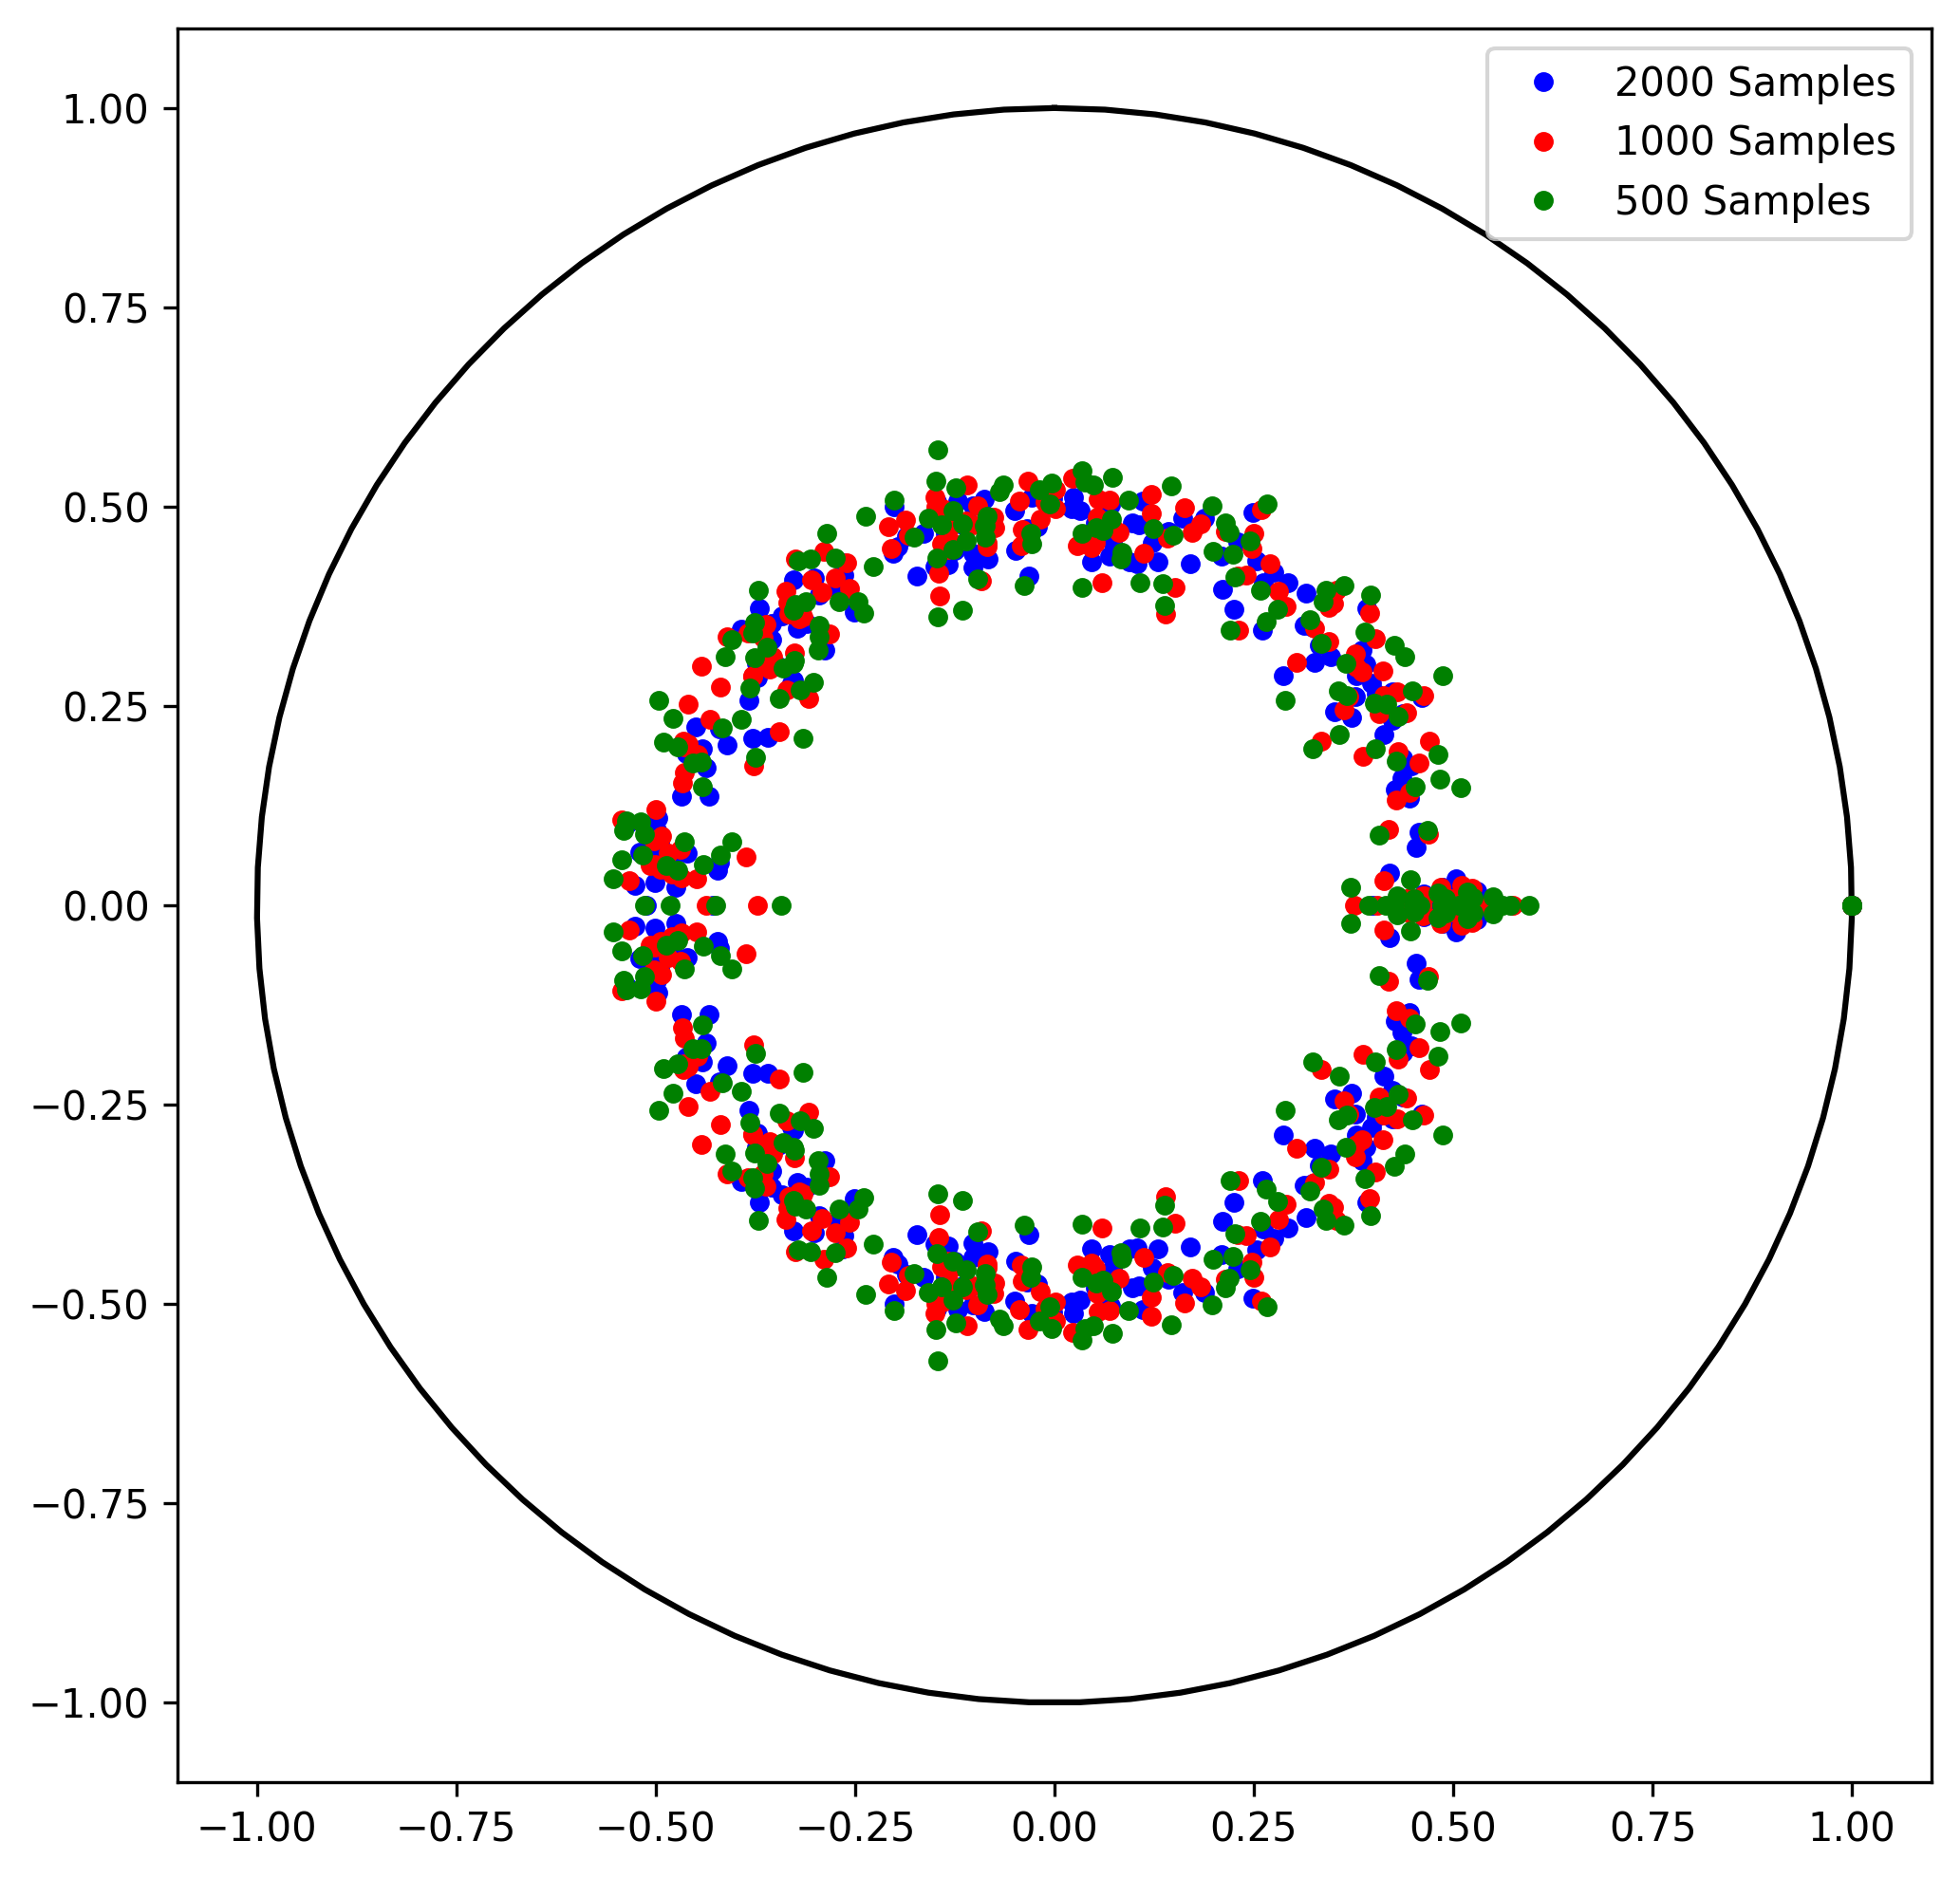

In [156]:
fig = plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)
plt.plot(*circle, "k")

plt.plot(*spectrum_stab1, "bo", markersize=4)
plt.plot(*spectrum_stab2, "ro", markersize=4)
plt.plot(*spectrum_stab3, "go", markersize=4)

plt.legend(["_","2000 Samples", "1000 Samples", "500 Samples"])

#plt.legend(["_","No Delay","5$\mu$s Delay","10$\mu$s Delay", "15$\mu$s Delay","20$\mu$s Delay", "25$\mu$s Delay"], loc = "upper right")

plt.show()

In [16]:
inputs_map, inputs_spam, counts_list =  pickle.load(open("../../data/threeQubits_PQC_10usDelay_belem_0.p", "rb"))
    
N_map = inputs_map[0].shape[0]

targets_map = counts_to_probs(counts_list[:N_map])
targets_spam = counts_to_probs(counts_list[N_map:])

d = targets_map.shape[1]
n = int(np.log2(d))

spam = SPAM2(d=2**3,     
             optimizer = tf.optimizers.Adam(learning_rate=0.01),
#             init_rank=None,
#             povm_rank=None
             )

spam.train(inputs = inputs_spam,
           targets = targets_spam,
           num_iter = 2000,
           verbose = False,
          )

  0%|          | 0/2000 [00:00<?, ?it/s]

0.1277310812134179


In [17]:
inputs_map, inputs_spam, counts_list =  pickle.load(open("../../data/threeQubits_PQC_10usDelay_belem_0.p", "rb"))
    
N_map = inputs_map[0].shape[0]

targets_map = counts_to_probs(counts_list[:N_map])
targets_spam = counts_to_probs(counts_list[N_map:])

d = targets_map.shape[1]
n = int(np.log2(d))

spam = SPAM(d=2**3,     
             optimizer = tf.optimizers.Adam(learning_rate=0.01),
             use_corr_mat = True,
#             init_rank=None,
#             povm_rank=None
             )

spam.train(inputs = inputs_spam,
           targets = targets_spam,
           num_iter = 2000,
           verbose = False,
          )

  0%|          | 0/2000 [00:00<?, ?it/s]

0.009537739085032589
